In [54]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpPCwLwS/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpPCwLwS/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpPCwLwS/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpPCwLwS/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpPCwLwS/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpPCwLwS/downloaded_packages


### import data and visualise the target variable

[1] "MOS_test"       "fit"            "list"           "mse"           
 [5] "plot1"          "plot2"          "plot3"          "predictions"   
 [9] "squared_errors" "target"         "varb"           "varb_name"

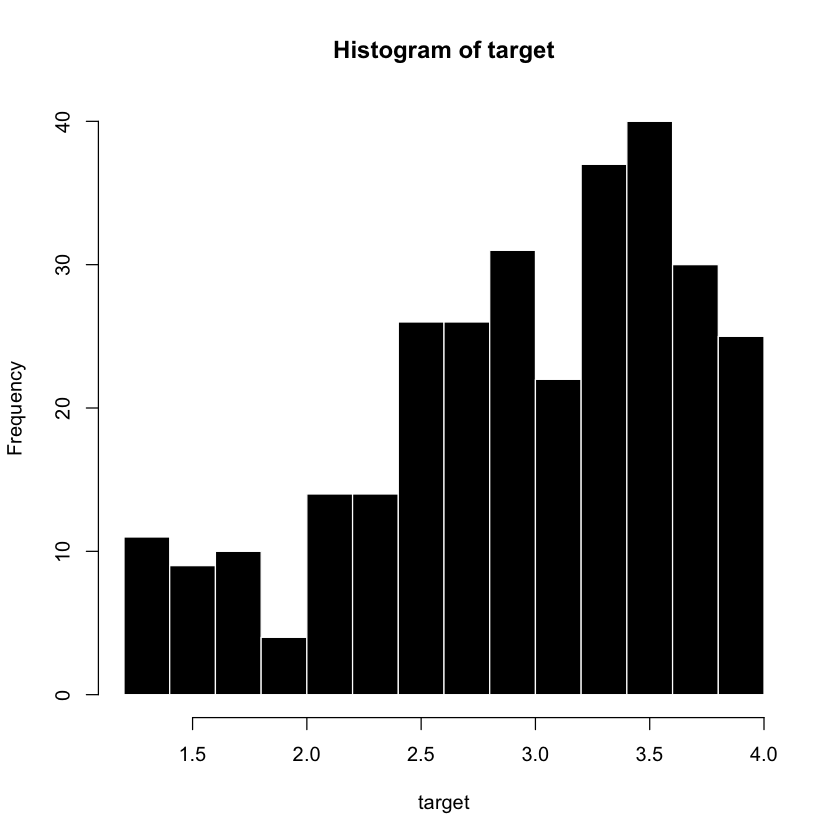

In [31]:
(list=ls()) #clears the workspace
#import dataset
#REPLACE WITH THE FILEPATH OF THE OUTPUT FROM MOS
MOS_test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE1_final_regression_table copy.csv") 
target = MOS_test$agg_MOS #make sure column header matches
par(bg = "white")  # set background color to white

#plot the target variable
par(bg = "white")
hist(target, 
     col = "black",
     border = "white")

Scatter plots against predictors

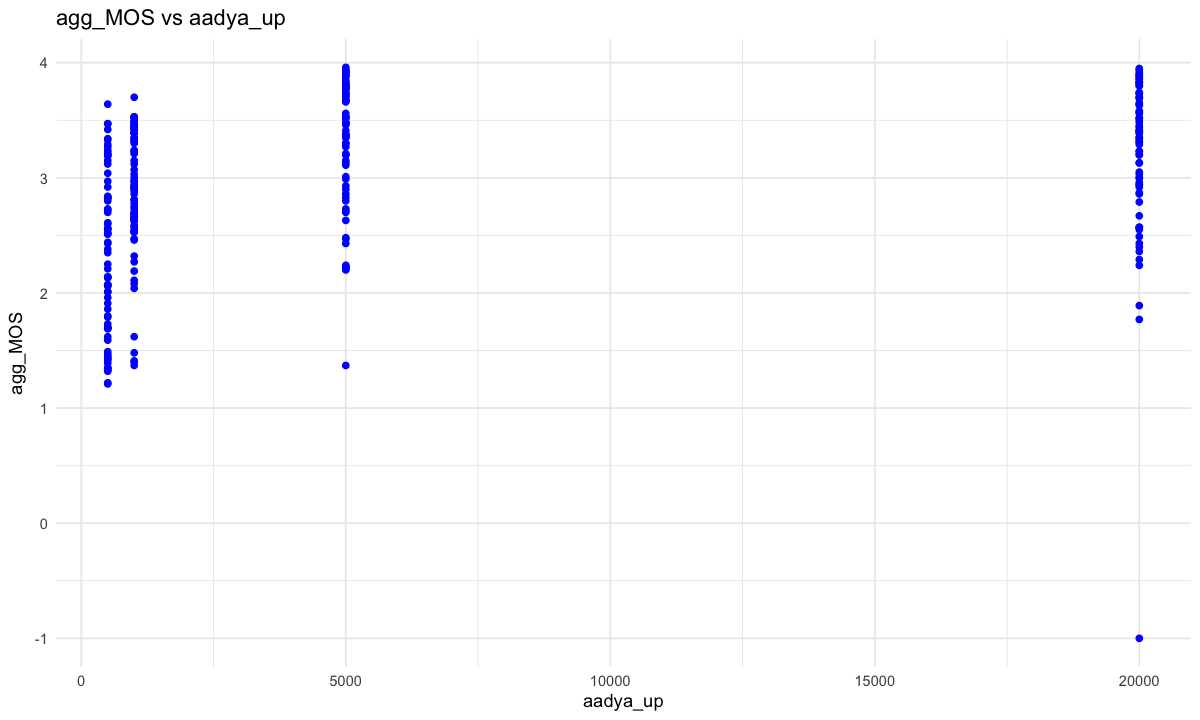

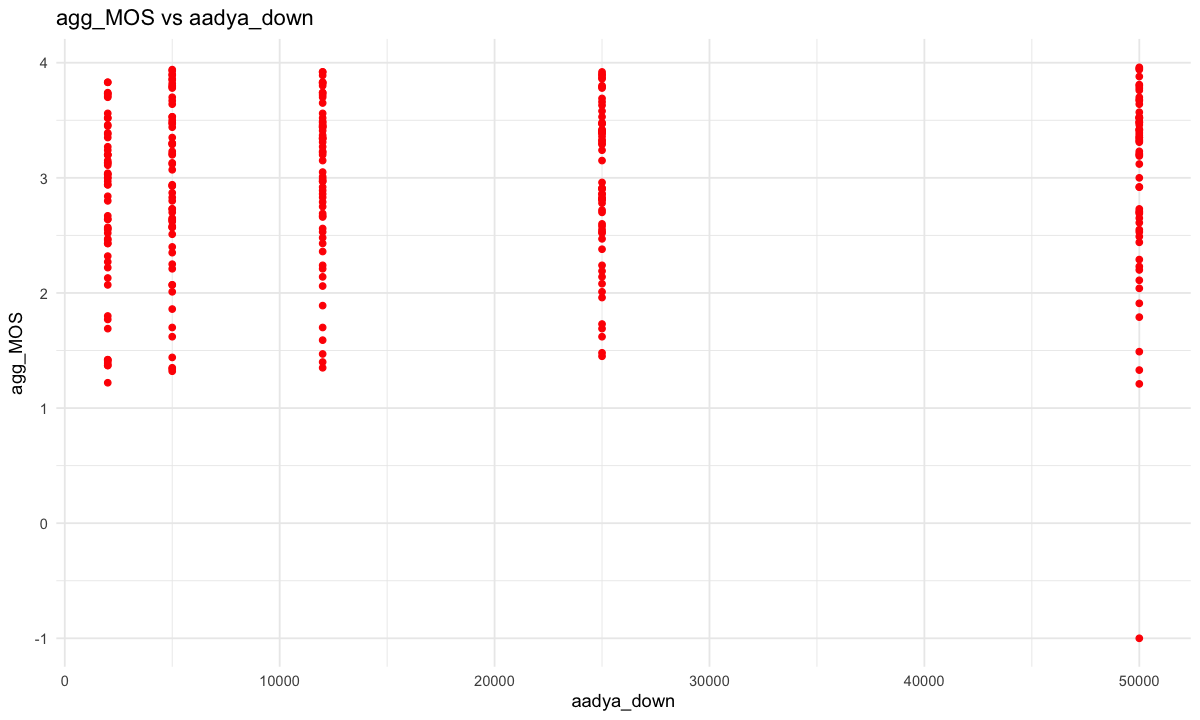

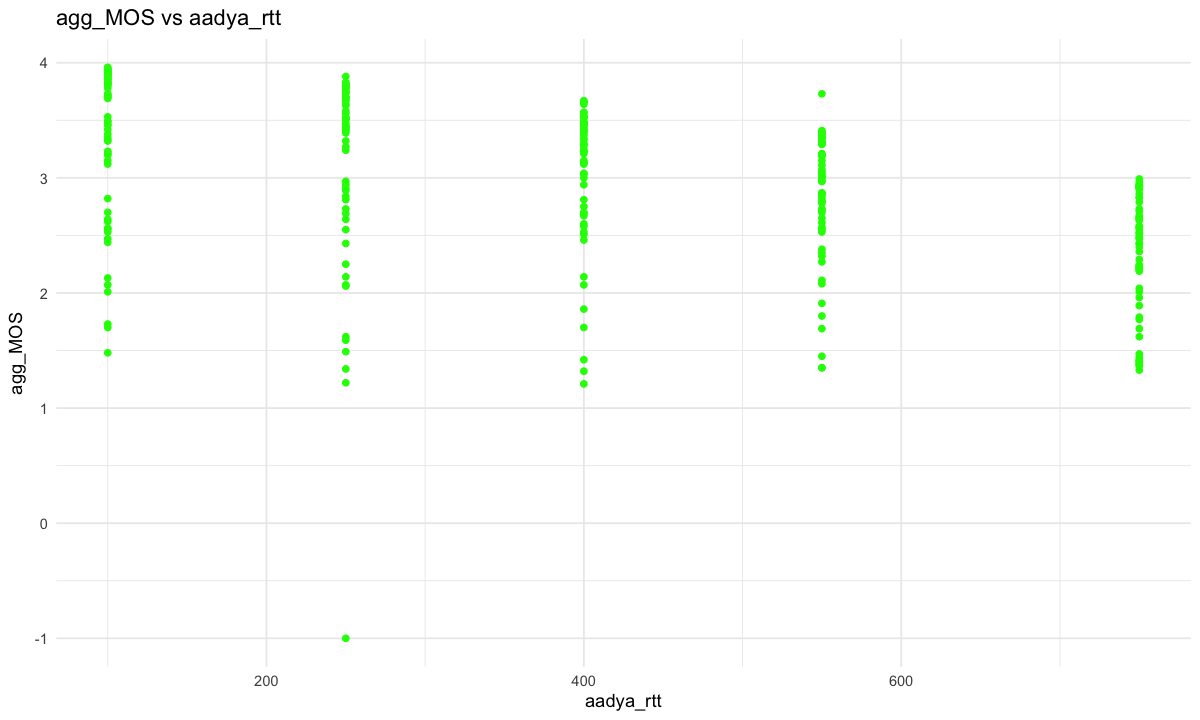

In [59]:
library(ggplot2)
library(cowplot)
library(IRdisplay)
options(repr.plot.width = 10, repr.plot.height = 6)

# Scatter plot for agg_MOS vs aadya_up
ggplot(MOS_test, aes(x = aadya_up, y = agg_MOS)) +
  geom_point(color = "blue") +
  labs(title = "agg_MOS vs aadya_up", x = "aadya_up", y = "agg_MOS") +
  theme_minimal()

# Scatter plot for agg_MOS vs aadya_down
ggplot(MOS_test, aes(x = aadya_down, y = agg_MOS)) +
  geom_point(color = "red") +
  labs(title = "agg_MOS vs aadya_down", x = "aadya_down", y = "agg_MOS") +
  theme_minimal()

# Scatter plot for agg_MOS vs aadya_rtt
ggplot(MOS_test, aes(x = aadya_rtt, y = agg_MOS)) +
  geom_point(color = "green") +
  labs(title = "agg_MOS vs aadya_rtt", x = "aadya_rtt", y = "agg_MOS") +
  theme_minimal()

# Simple linear regression 

## fits a linear regression to the data
stores it in the var fit <br>
dependent var: AGG_MOS <br>
predictor vars: up, down, rtt <br>

In [43]:
fit <- lm(agg_MOS ~ aadya_up + aadya_down + aadya_rtt, MOS_test) #EDIT THESE TO THE COL NAMES
summary(fit)


Call:
lm(formula = agg_MOS ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6396 -0.2553  0.1077  0.4613  1.1019 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.269e+00  8.928e-02  36.615  < 2e-16 ***
aadya_up     2.918e-05  4.557e-06   6.404 5.92e-10 ***
aadya_down   2.944e-06  2.062e-06   1.428    0.154    
aadya_rtt   -1.441e-03  1.591e-04  -9.058  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6248 on 296 degrees of freedom
Multiple R-squared:  0.2971,	Adjusted R-squared:   0.29 
F-statistic:  41.7 on 3 and 296 DF,  p-value: < 2.2e-16


## Perform prediction
performs prediction based on the fit from above <br>
and plots it against the actual MOS scores <br>

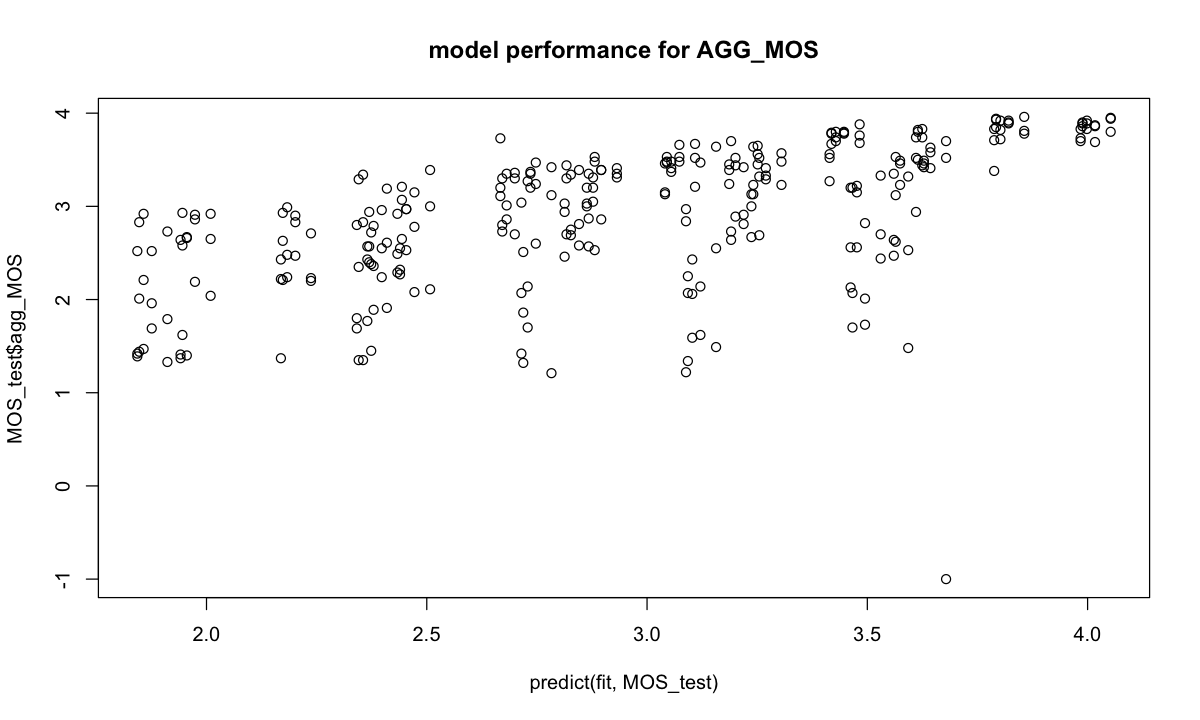

In [60]:
par(bg = "white")  # set background color to white
options(repr.plot.width = 10, repr.plot.height = 6)
predictions <- predict(fit, MOS_test)
plot(predict(fit, MOS_test), MOS_test$agg_MOS, main="model performance for AGG_MOS")
#plots the predicted values against the real values for each datapoint
#a perfect regression would have a y=x diagonal line

plots residuals- there should be no trend. If there is a trend then it means something non-linear is happening

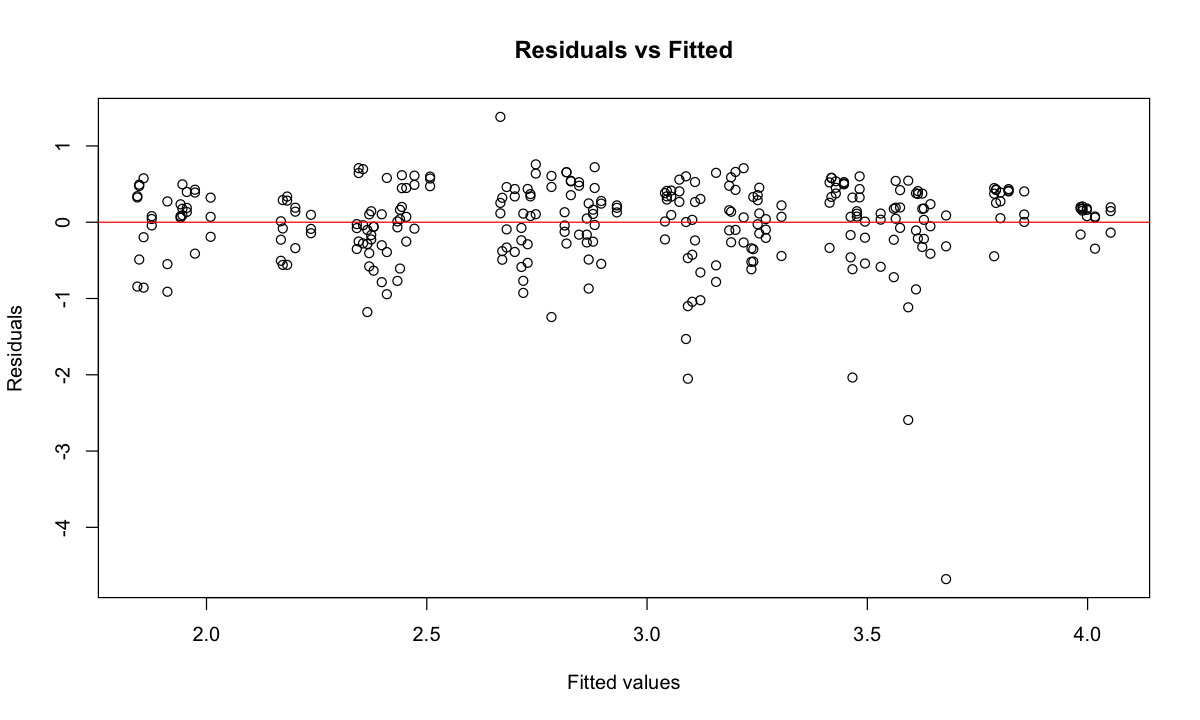

In [61]:
par(bg = "white")  # set background color to white
options(repr.plot.width = 10, repr.plot.height = 6)
plot(fit$fitted.values, resid(fit), 
     main = "Residuals vs Fitted", 
     xlab = "Fitted values", 
     ylab = "Residuals")
abline(h = 0, col = "red")

Mean squared error

In [36]:
# Calculate the squared errors
squared_errors <- (predictions - target)^2
# Calculate MSE
mse <- mean(squared_errors)
# Print MSE
cat("Mean Squared Error (MSE):", mse, "\n")

Mean Squared Error (MSE): 0.3126389 


# General function to fit and plot

### for a completely linear relationship of the three vars - we could generalise so it can handle logs and stuff too

In [78]:
plot_vars_against_targ <- function(target, target_name) {
  library(ggplot2)
  #import data
  MOS_test <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE1_final_regression_table.csv") 
  #perform fit
  fit <- lm(target ~ aadya_up + aadya_down + aadya_rtt, MOS_test)
  #print summary of variables and significance
  print(summary(fit))

  #set up plotting environment
  options(repr.plot.width = 10, repr.plot.height = 6) #fix size
  par(bg = "white")  # set background color to white

  # Scatter plot for aadya_up
  p1 <- ggplot(MOS_test, aes(x = aadya_up, y = target)) +
    geom_point(color = "blue") +
    labs(title = paste(target_name, "vs aadya_up"), x = "aadya_up", y = target_name) +
    theme_minimal()
  print(p1)
  p2 <- ggplot(MOS_test, aes(x = aadya_down, y = target)) +
    geom_point(color = "purple") +
    labs(title = paste(target_name, "vs aadya_down"), x = "aadya_down", y = target_name) +
    theme_minimal()
  print(p2)
  p3 <- ggplot(MOS_test, aes(x = aadya_rtt, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs aadya_rtt"), x = "aadya_rtt", y = target_name) +
    theme_minimal()
  print(p3)



  #plots the predicted values against the real values for each datapoint
  predictions <- predict(fit, MOS_test)
  plot(predict(fit, MOS_test), target, main= paste("model performance for", target_name))
}

# Execution cells for fitting and plotting


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7424 -0.3069  0.0766  0.6059  0.9807 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.735e+00  1.055e-01  25.922   <2e-16 ***
aadya_up     4.810e-05  5.385e-06   8.932   <2e-16 ***
aadya_down   3.006e-06  2.436e-06   1.234   0.2182    
aadya_rtt   -4.196e-04  1.880e-04  -2.231   0.0264 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7384 on 296 degrees of freedom
Multiple R-squared:  0.2257,	Adjusted R-squared:  0.2179 
F-statistic: 28.76 on 3 and 296 DF,  p-value: 2.391e-16



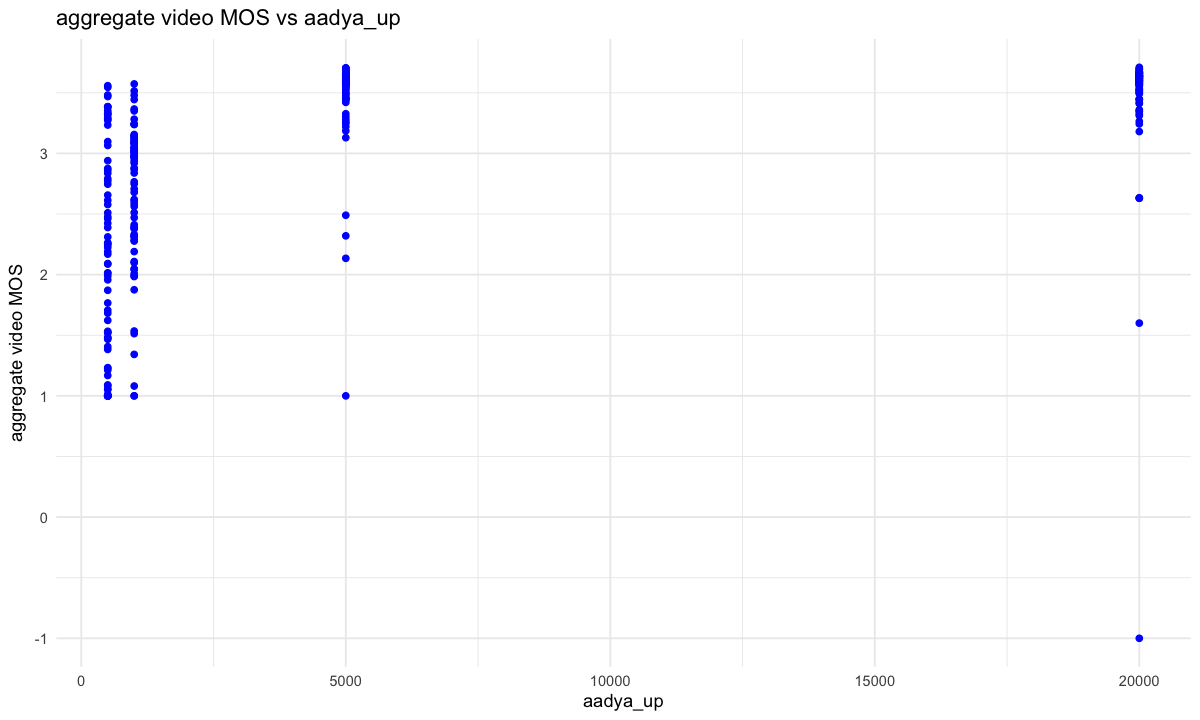

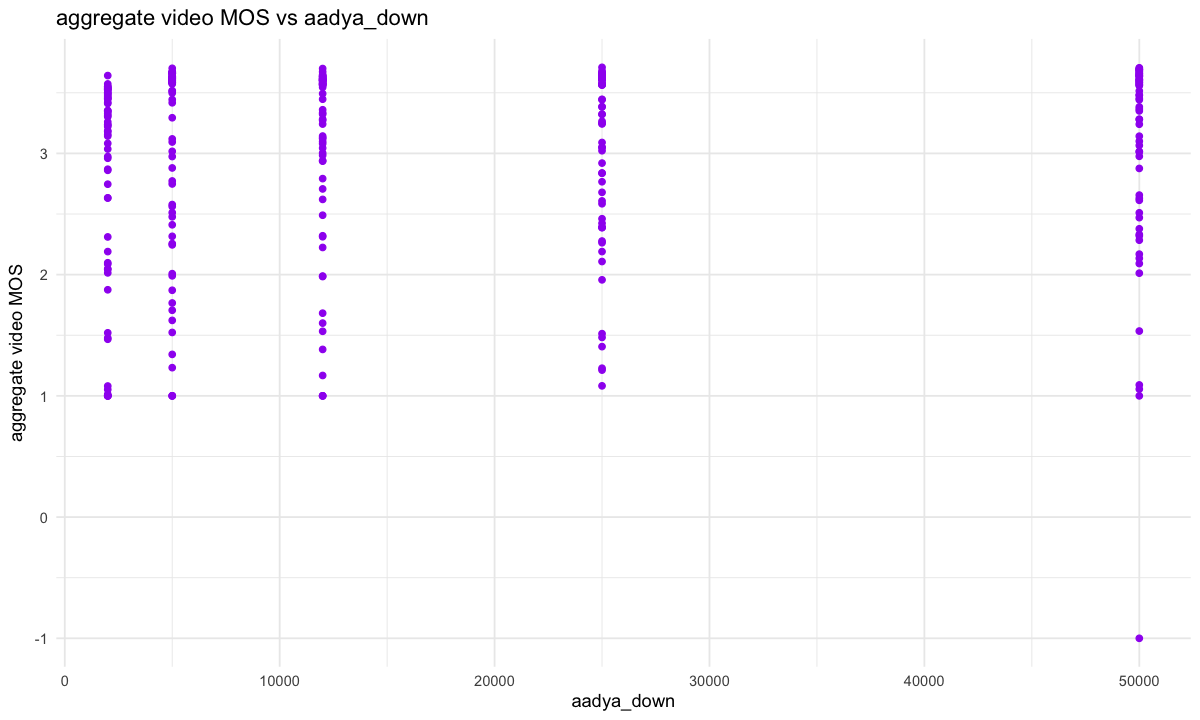

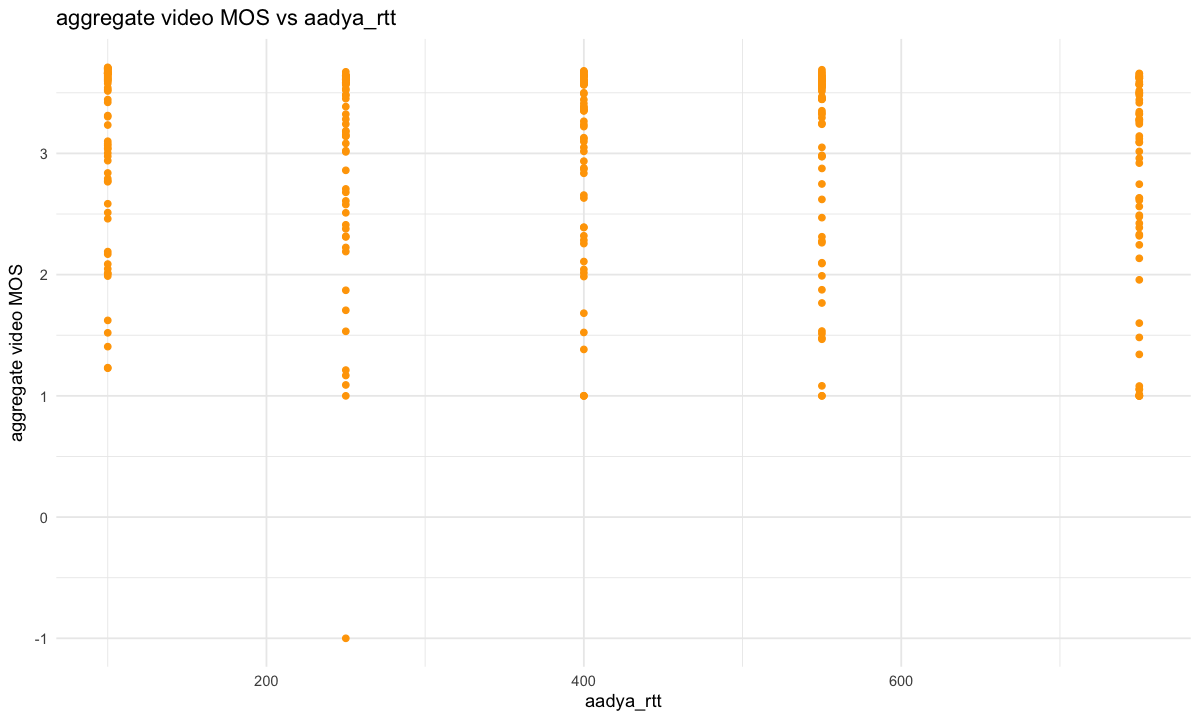

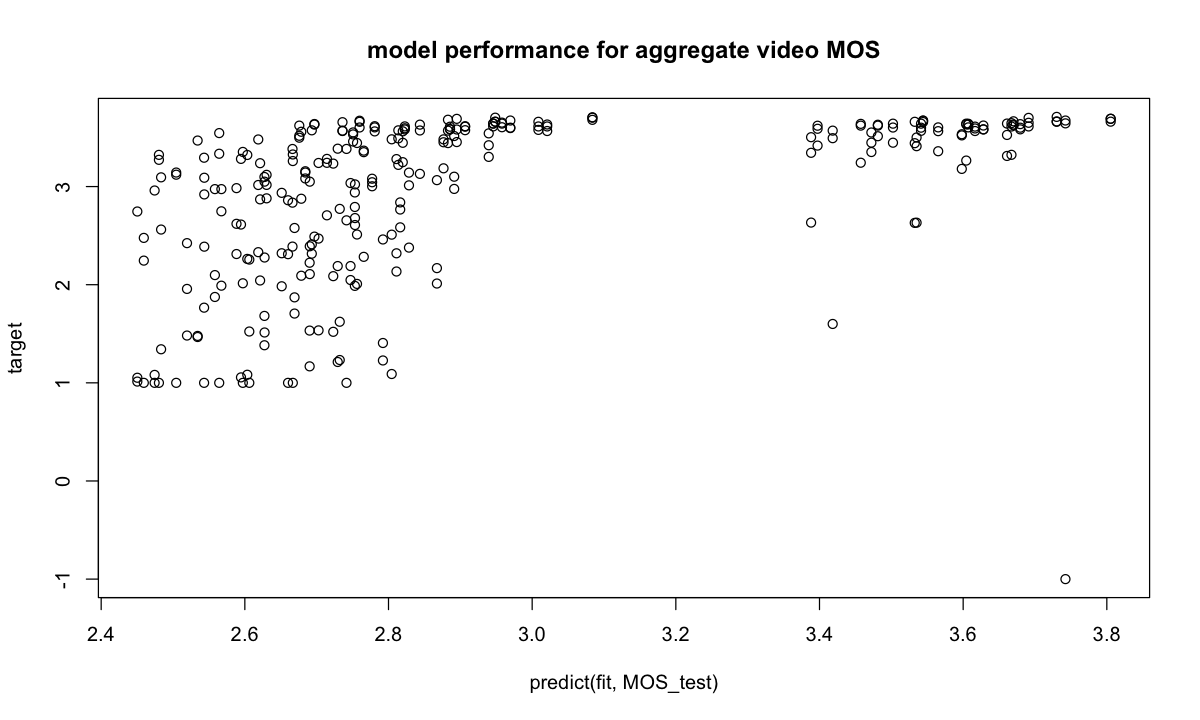

In [79]:
plot_vars_against_targ(MOS_test$agg_video_MOS, "aggregate video MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6003 -0.2436  0.1214  0.4056  1.4955 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.842e+00  8.336e-02  46.089  < 2e-16 ***
aadya_up     1.548e-05  4.255e-06   3.639 0.000323 ***
aadya_down   1.422e-06  1.925e-06   0.739 0.460702    
aadya_rtt   -2.491e-03  1.486e-04 -16.765  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5834 on 296 degrees of freedom
Multiple R-squared:  0.499,	Adjusted R-squared:  0.4939 
F-statistic: 98.28 on 3 and 296 DF,  p-value: < 2.2e-16



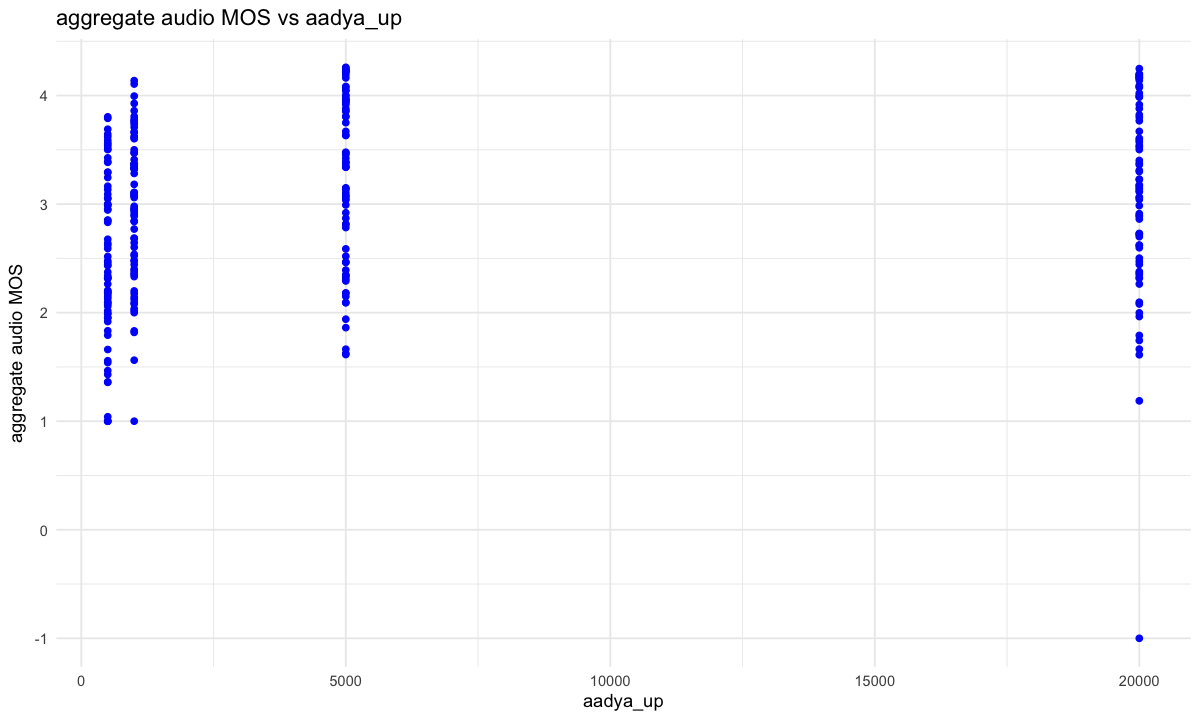

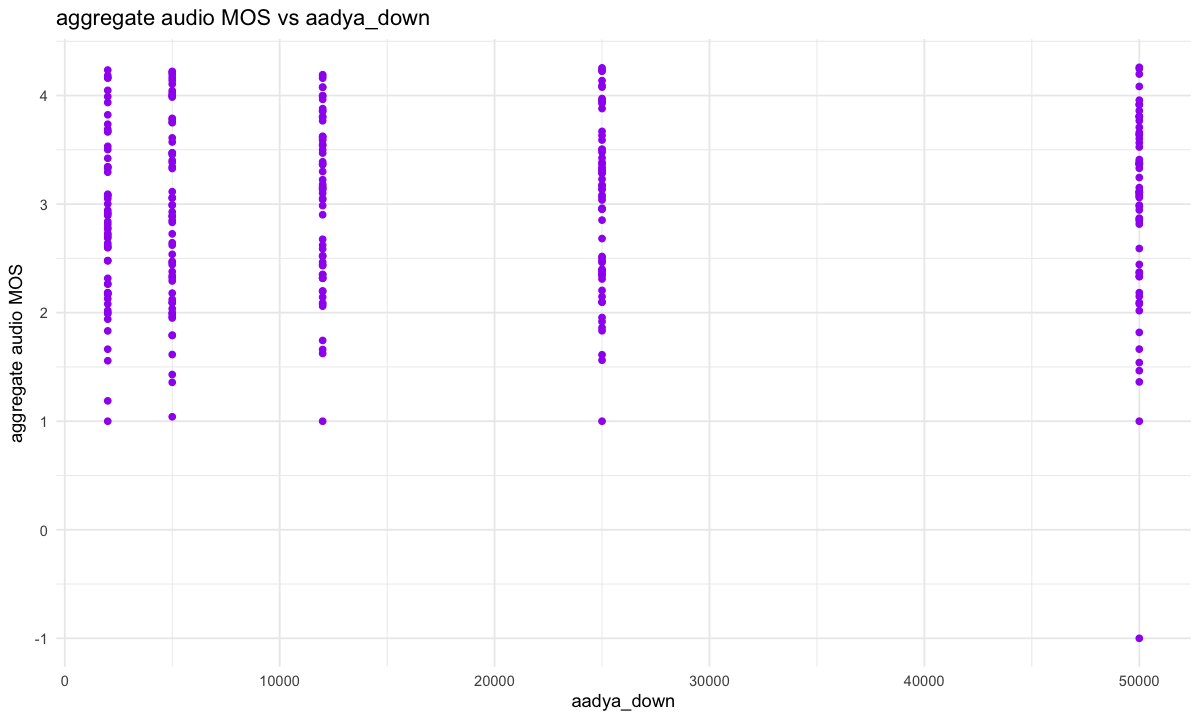

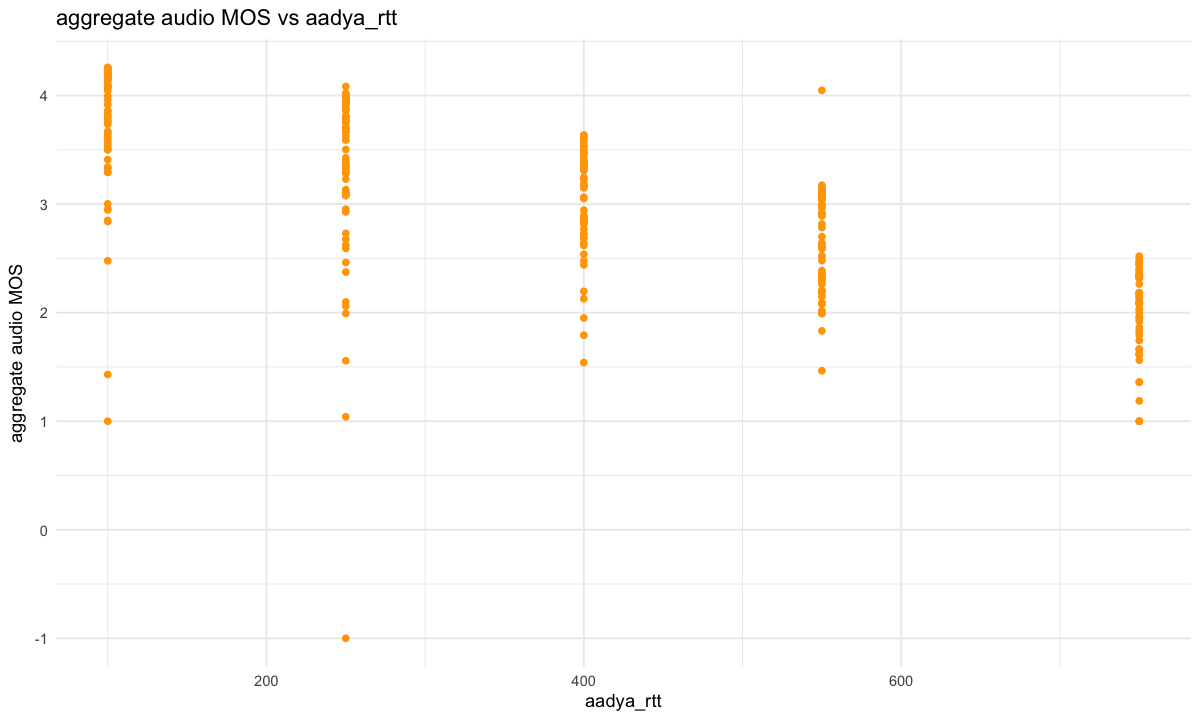

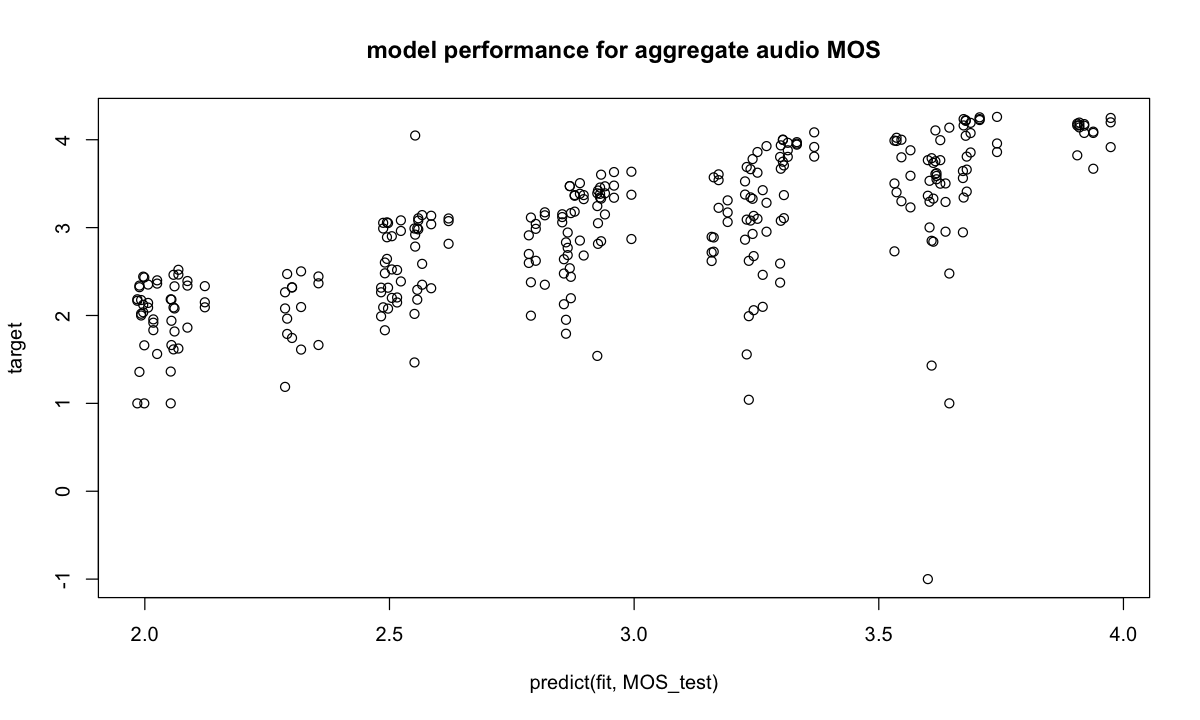

In [80]:
plot_vars_against_targ(MOS_test$agg_audio_MOS, "aggregate audio MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6507 -0.1049  0.0785  0.2568  1.1200 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.031e+00  6.417e-02  62.816   <2e-16 ***
aadya_up     2.436e-06  3.275e-06   0.744    0.458    
aadya_down   2.034e-06  1.482e-06   1.373    0.171    
aadya_rtt   -2.122e-03  1.144e-04 -18.553   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4491 on 296 degrees of freedom
Multiple R-squared:  0.5394,	Adjusted R-squared:  0.5347 
F-statistic: 115.5 on 3 and 296 DF,  p-value: < 2.2e-16



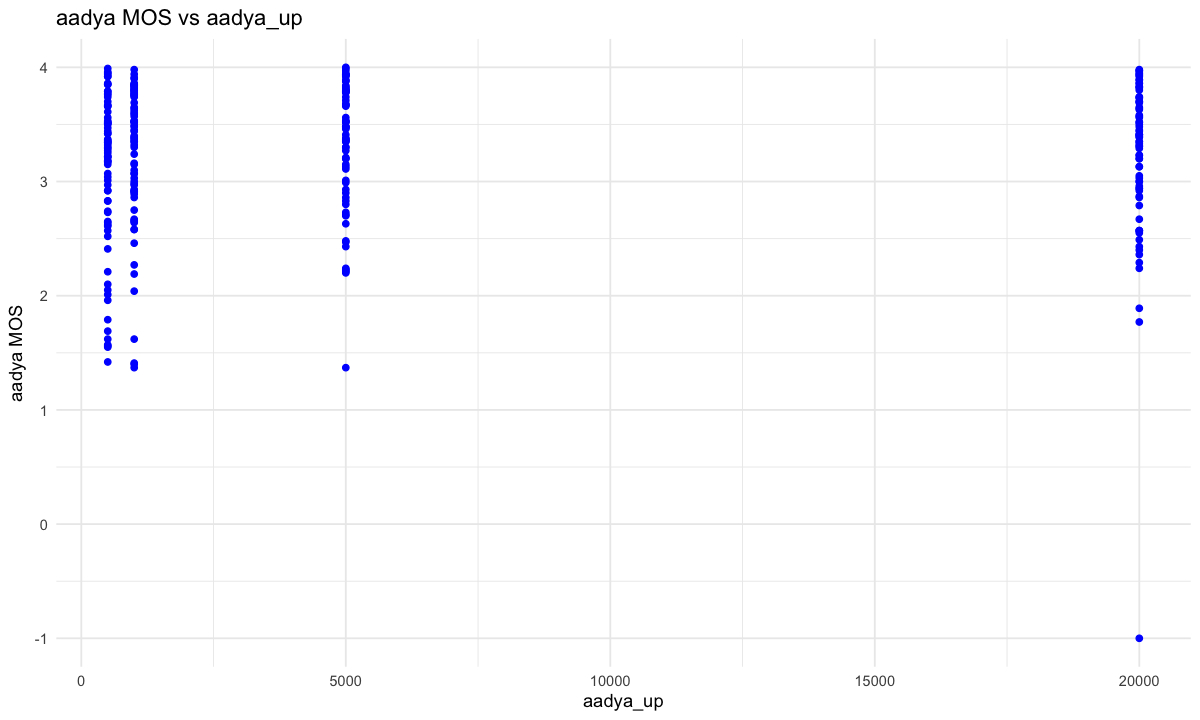

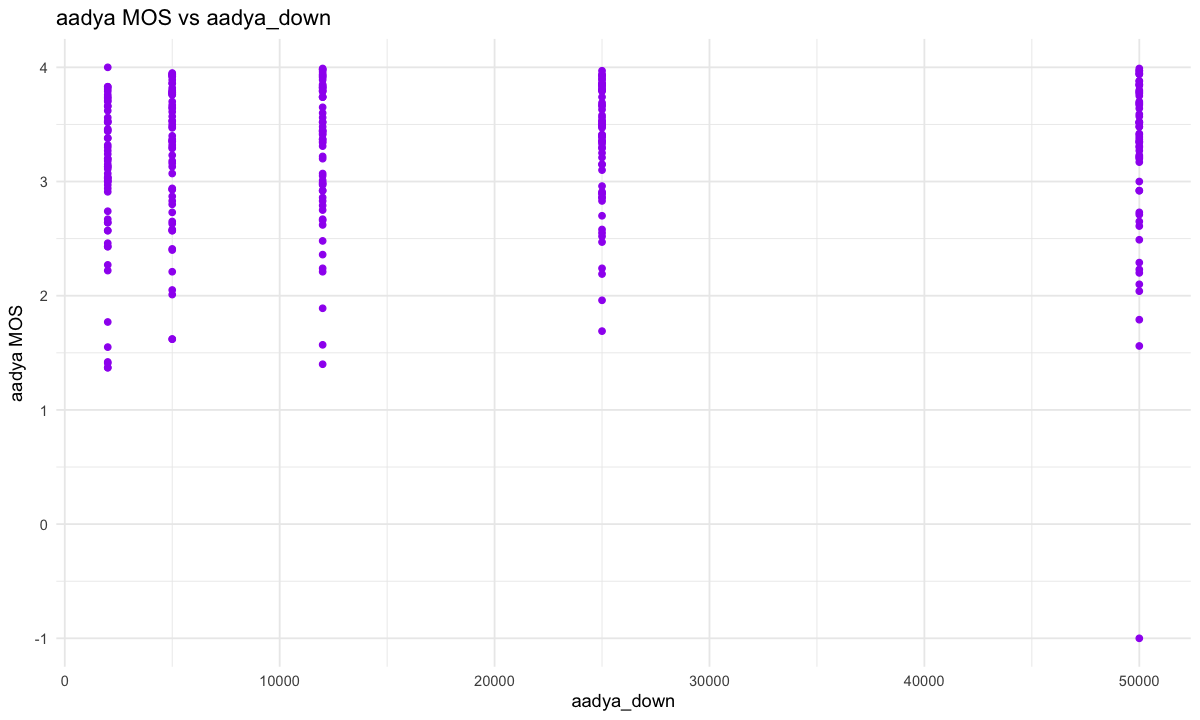

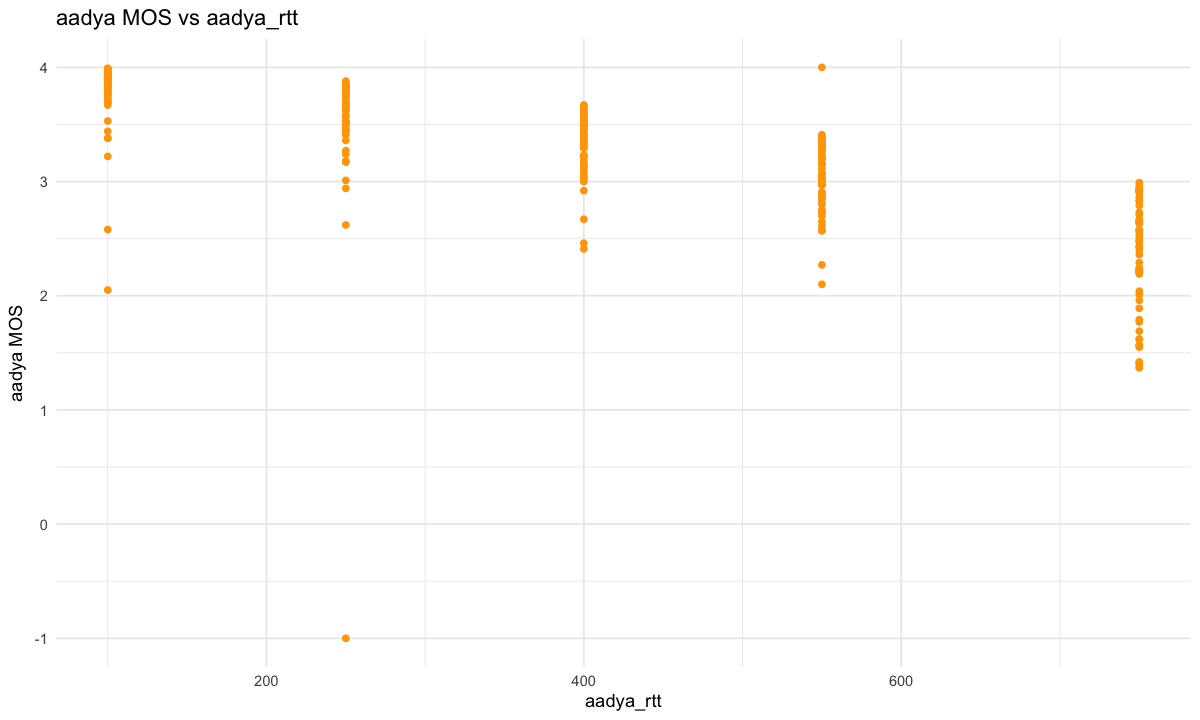

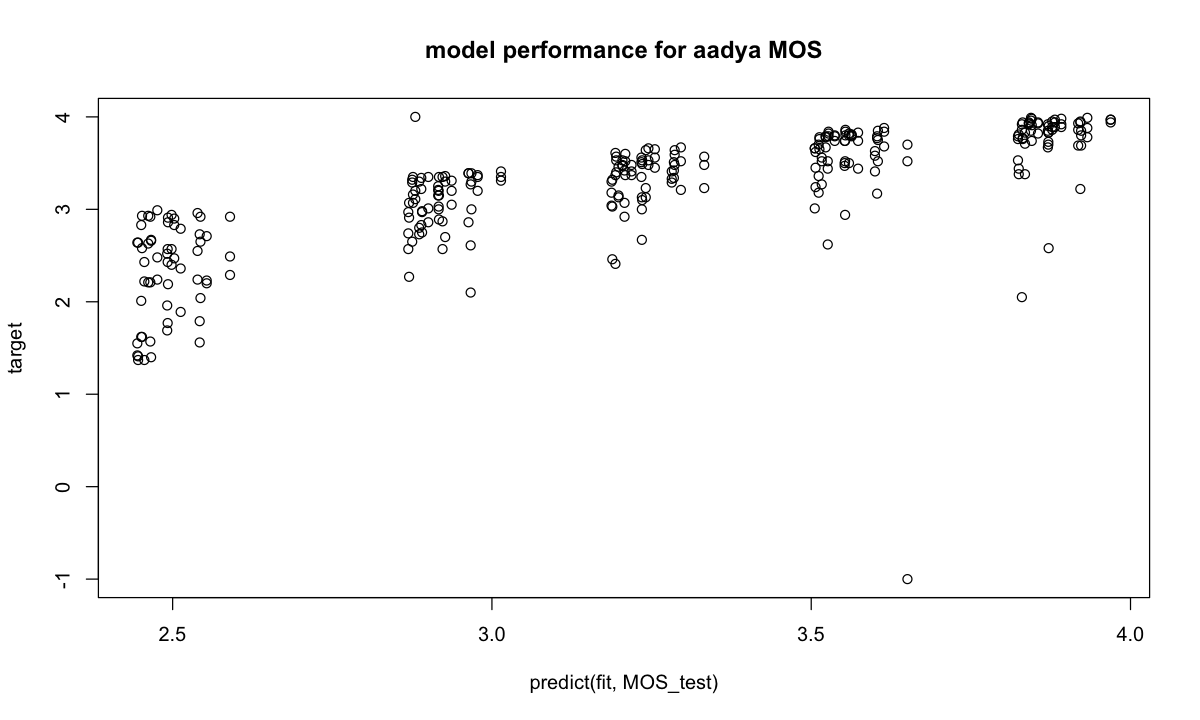

In [81]:
plot_vars_against_targ(MOS_test$aadya_MOS, "aadya MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9858 -0.2277  0.0019  0.5406  0.8815 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.946e+00  9.732e-02  30.272   <2e-16 ***
aadya_up    4.949e-05  4.967e-06   9.963   <2e-16 ***
aadya_down  8.077e-07  2.247e-06   0.359    0.720    
aadya_rtt   3.911e-05  1.734e-04   0.225    0.822    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6811 on 296 degrees of freedom
Multiple R-squared:  0.2515,	Adjusted R-squared:  0.2439 
F-statistic: 33.15 on 3 and 296 DF,  p-value: < 2.2e-16



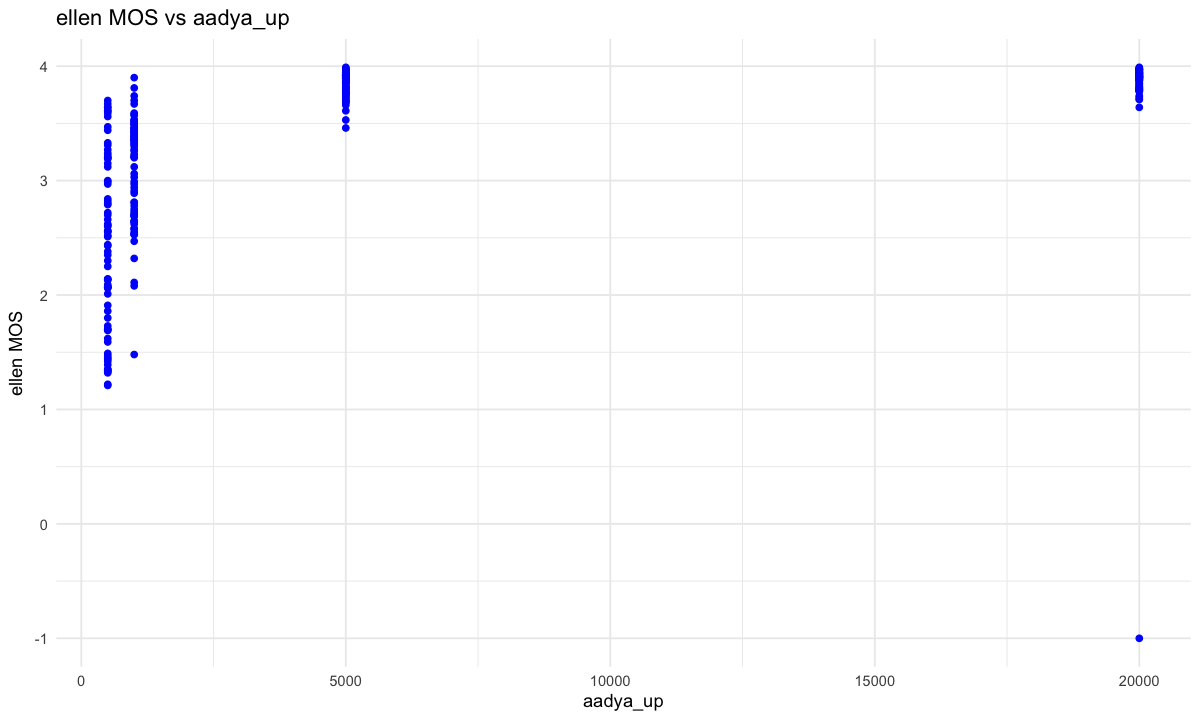

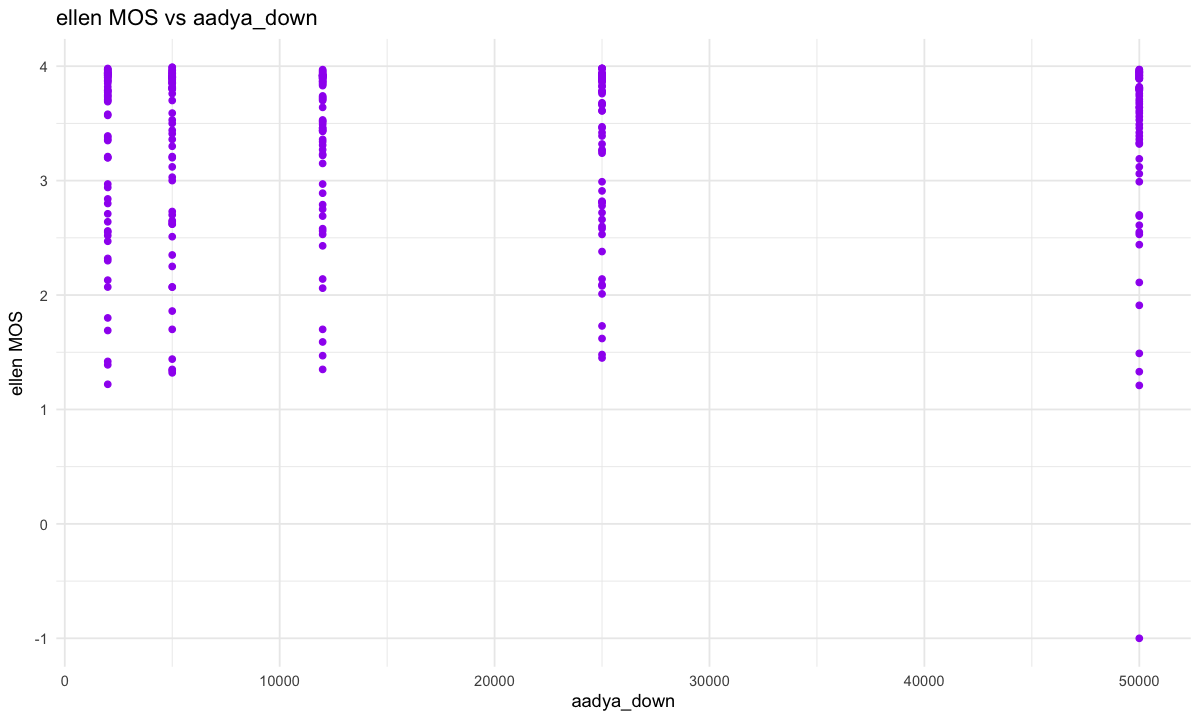

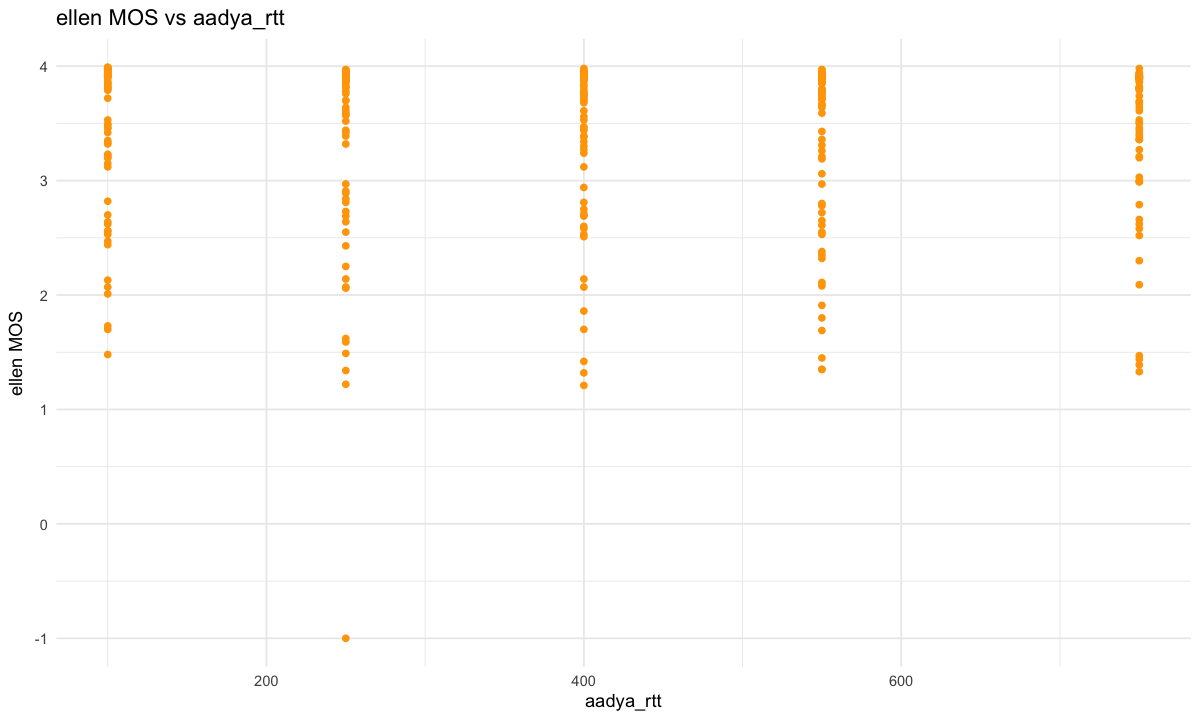

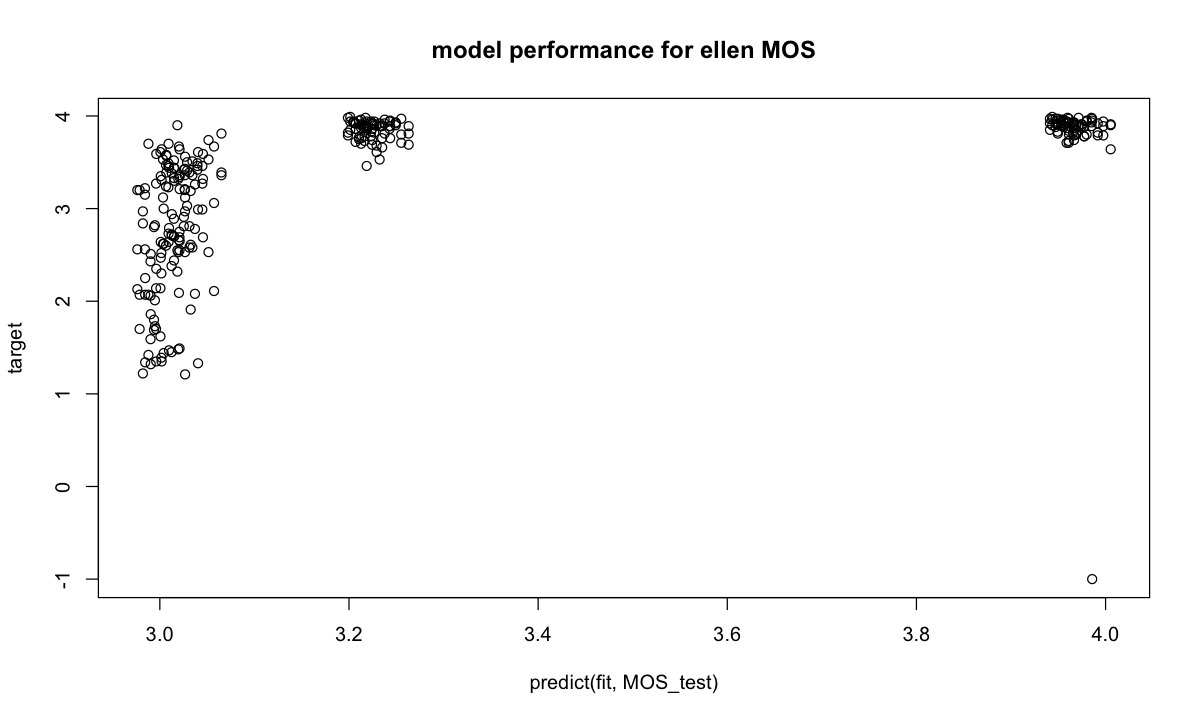

In [82]:
plot_vars_against_targ(MOS_test$ellen_MOS, "ellen MOS")

# STAGE 2

In [95]:
plot_vars_against_targ <- function(target, target_name) {
  library(ggplot2)
  #import data
  MOS_test <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/STAGE2_final_regression_table.csv") 
  #perform fit
  fit <- lm(target ~ aadya_up + aadya_down + aadya_rtt, MOS_test)
  #print summary of variables and significance
  print(summary(fit))

  #set up plotting environment
  options(repr.plot.width = 10, repr.plot.height = 6) #fix size
  par(bg = "white")  # set background color to white

  # Scatter plot for aadya_up
  p1 <- ggplot(MOS_test, aes(x = aadya_up, y = target)) +
    geom_point(color = "blue") +
    labs(title = paste(target_name, "vs aadya_up"), x = "aadya_up", y = target_name) +
    theme_minimal()
  print(p1)
  p2 <- ggplot(MOS_test, aes(x = aadya_down, y = target)) +
    geom_point(color = "purple") +
    labs(title = paste(target_name, "vs aadya_down"), x = "aadya_down", y = target_name) +
    theme_minimal()
  print(p2)
  p3 <- ggplot(MOS_test, aes(x = aadya_rtt, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs aadya_rtt"), x = "aadya_rtt", y = target_name) +
    theme_minimal()
  print(p3)
  #plots the predicted values against the real values for each datapoint
  predictions <- predict(fit, MOS_test)
  plot(predict(fit, MOS_test), target, main= paste("model performance for", target_name))
}


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0498 -0.3649  0.1528  0.4489  1.0614 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.080e+00  9.308e-02  33.085  < 2e-16 ***
aadya_up     2.542e-05  4.751e-06   5.350 1.76e-07 ***
aadya_down   8.111e-06  2.150e-06   3.773 0.000194 ***
aadya_rtt   -1.156e-03  1.659e-04  -6.966 2.11e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6514 on 296 degrees of freedom
Multiple R-squared:  0.2359,	Adjusted R-squared:  0.2282 
F-statistic: 30.46 on 3 and 296 DF,  p-value: < 2.2e-16



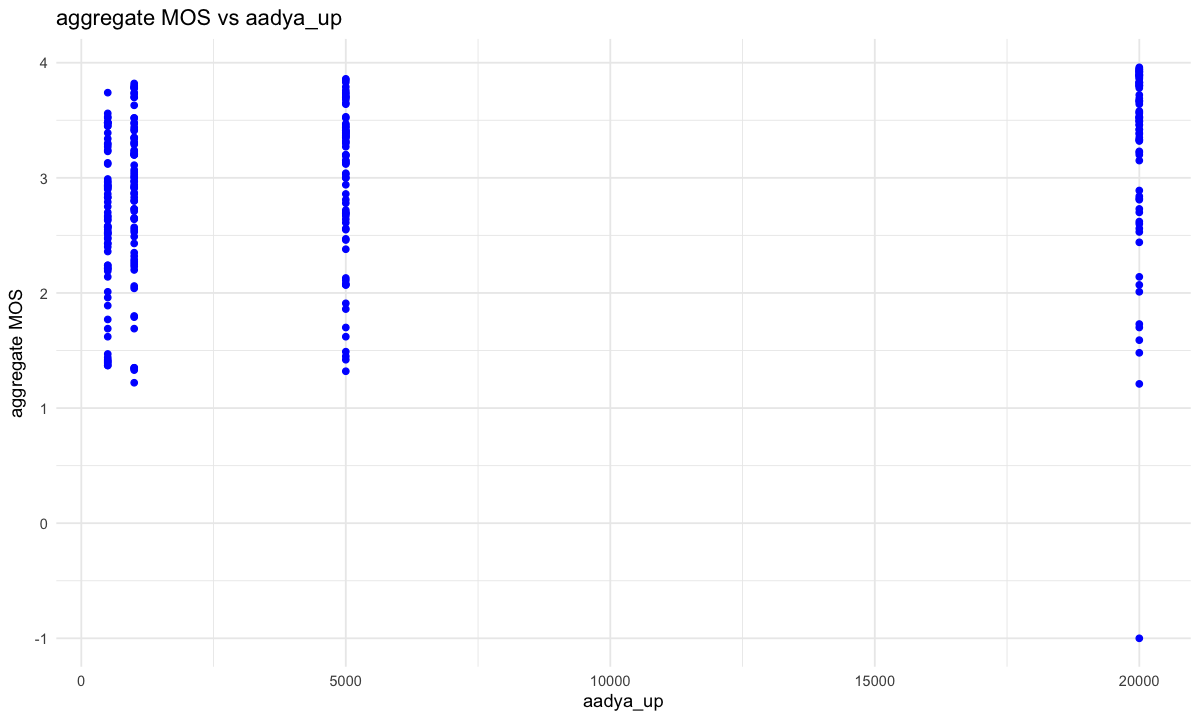

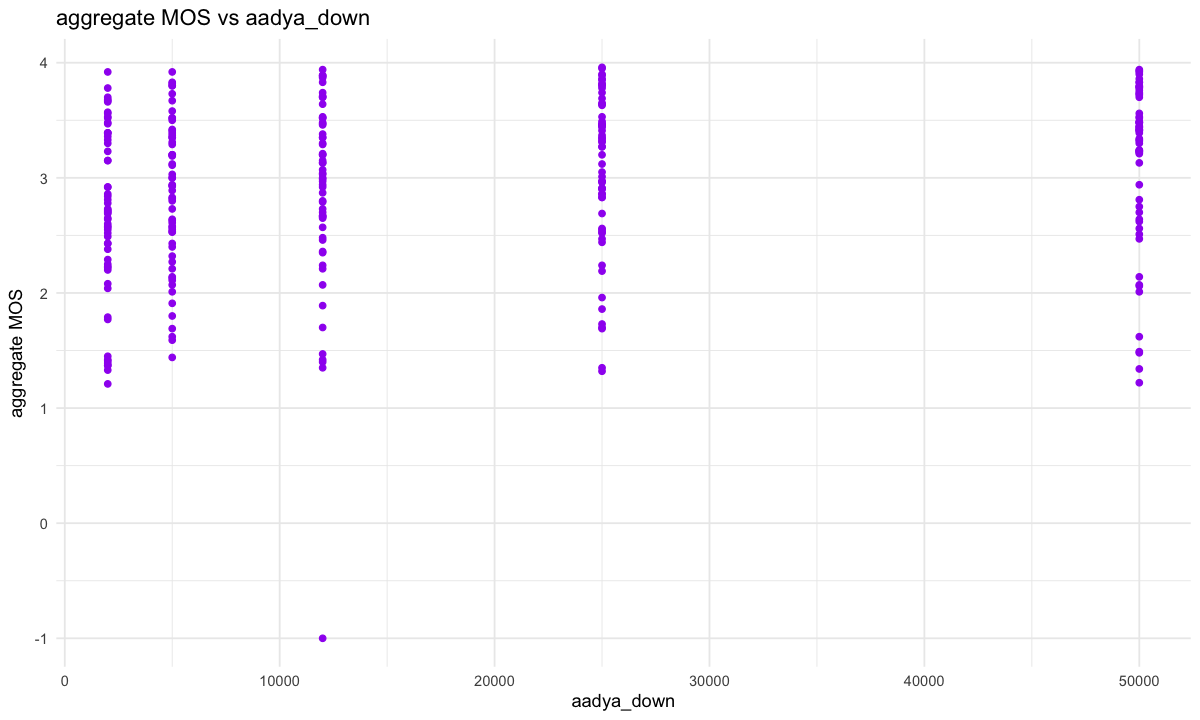

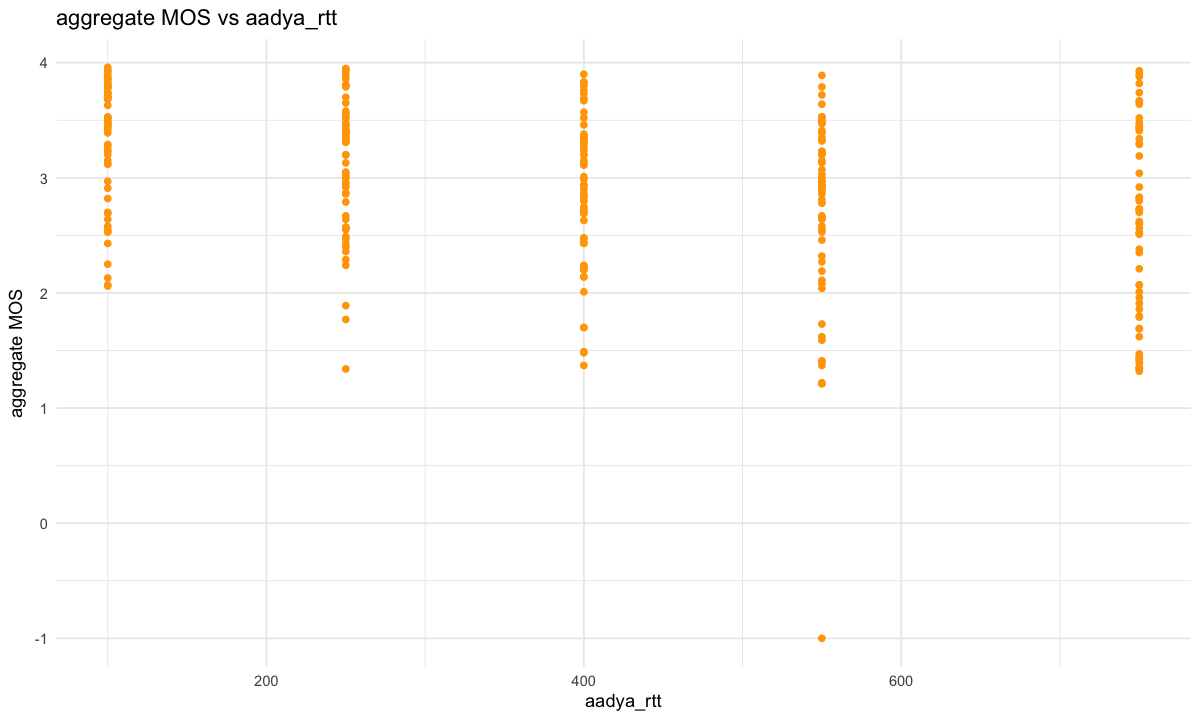

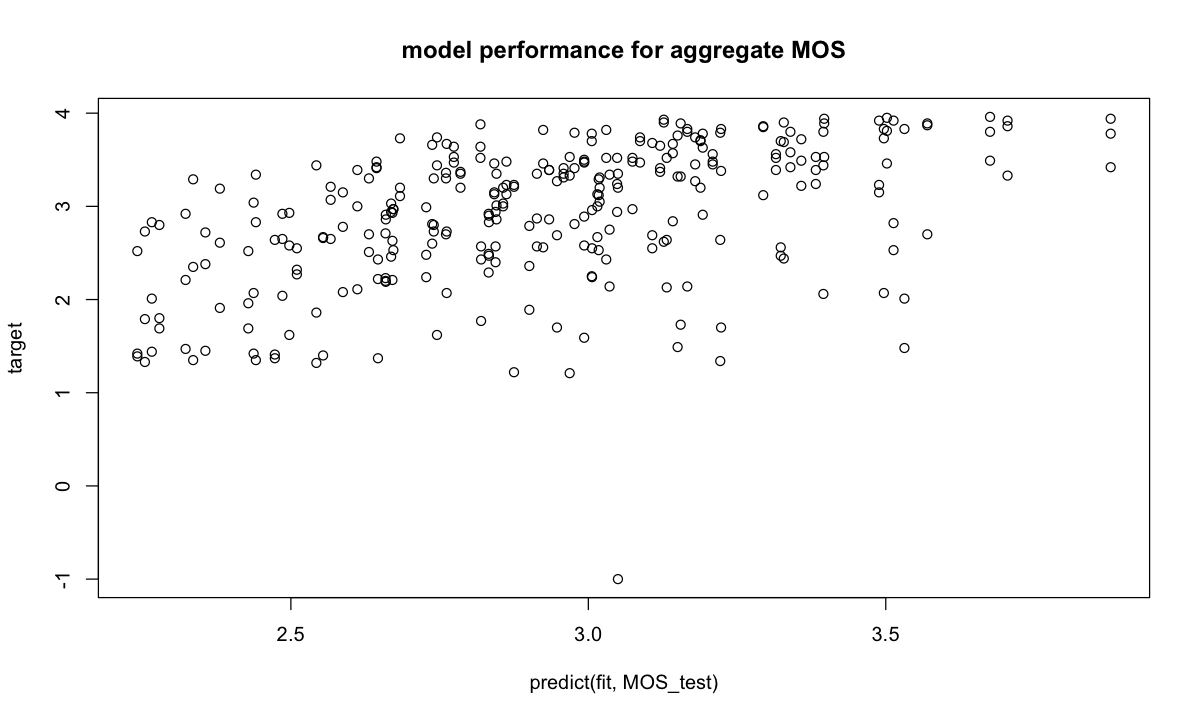

In [96]:
plot_vars_against_targ(MOS_test$agg_MOS, "aggregate MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2909 -0.3352  0.0731  0.4056  1.5125 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.947e+00  9.173e-02  32.129  < 2e-16 ***
aadya_up     4.541e-05  4.682e-06   9.700  < 2e-16 ***
aadya_down   1.248e-05  2.118e-06   5.893 1.03e-08 ***
aadya_rtt   -1.299e-03  1.635e-04  -7.946 4.06e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.642 on 296 degrees of freedom
Multiple R-squared:  0.3934,	Adjusted R-squared:  0.3872 
F-statistic: 63.98 on 3 and 296 DF,  p-value: < 2.2e-16



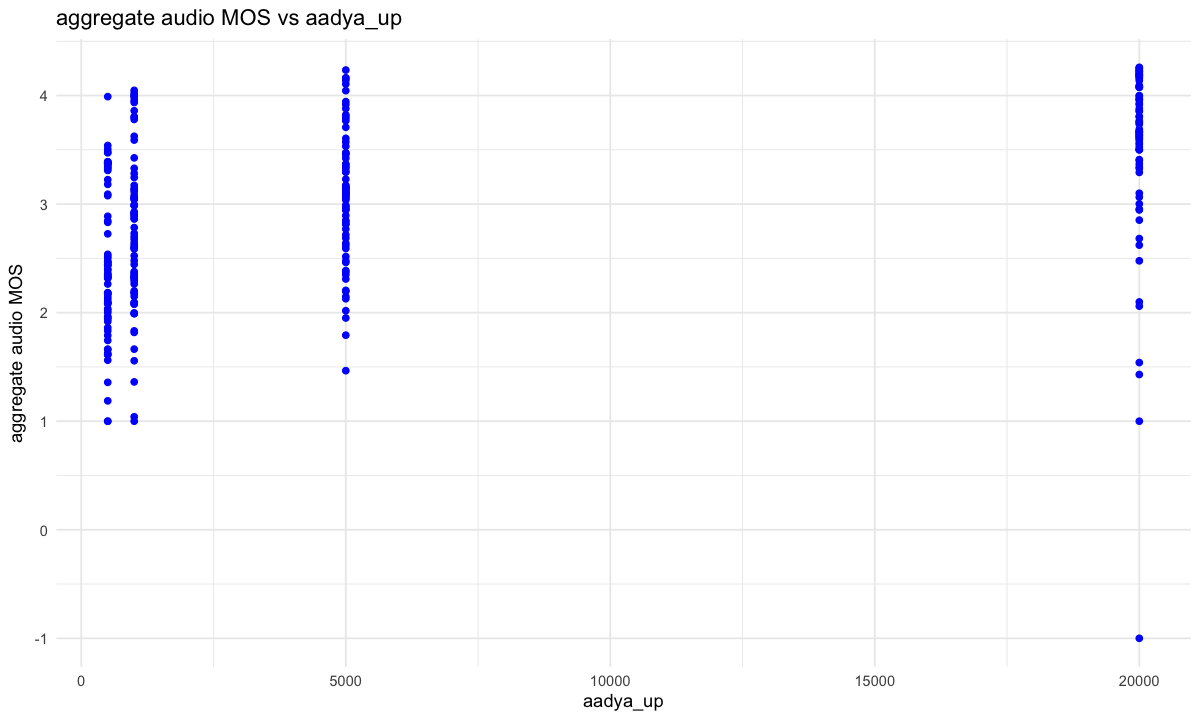

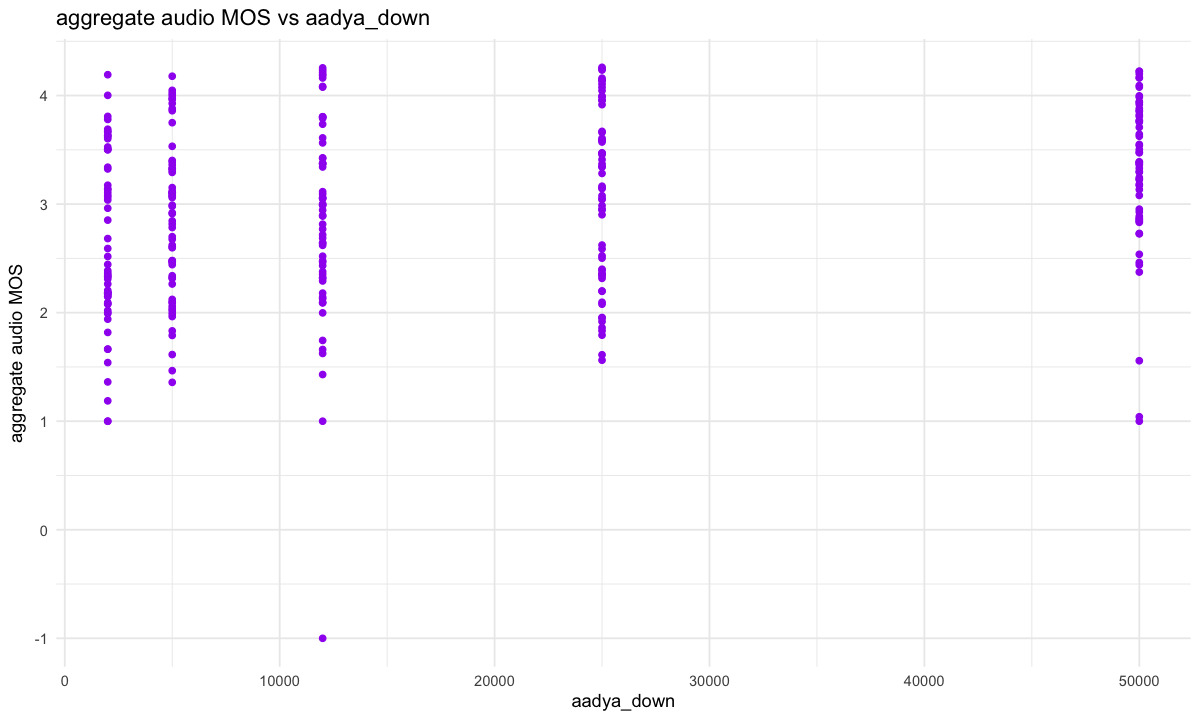

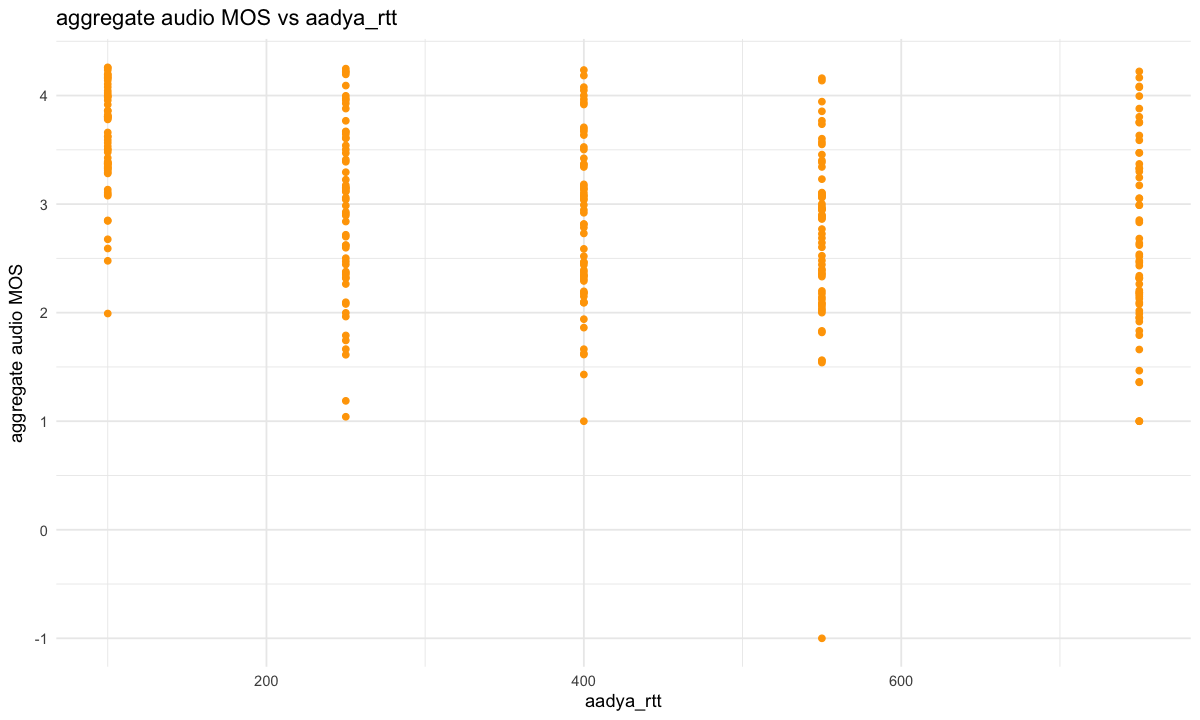

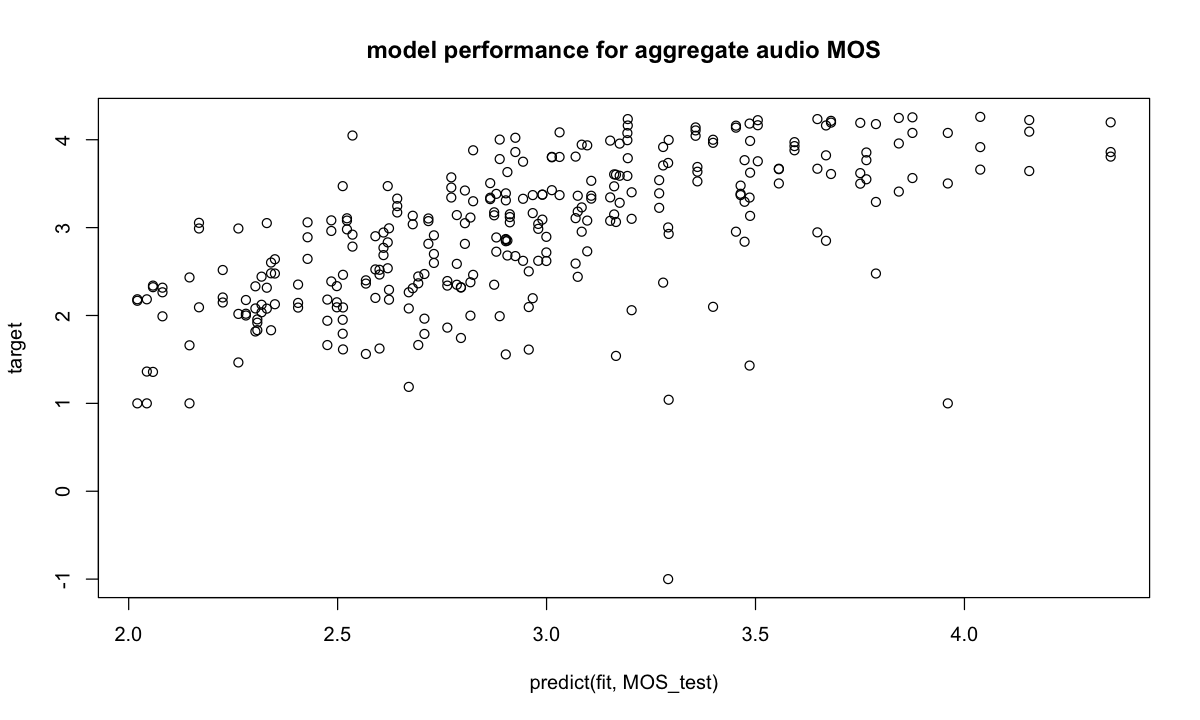

In [97]:
plot_vars_against_targ(MOS_test$agg_audio_MOS, "aggregate audio MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8297 -0.4452  0.2985  0.5510  1.1321 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.316e+00  1.126e-01  29.454  < 2e-16 ***
aadya_up     6.525e-06  5.746e-06   1.136    0.257    
aadya_down   3.932e-06  2.600e-06   1.513    0.131    
aadya_rtt   -1.207e-03  2.006e-04  -6.016 5.26e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7879 on 296 degrees of freedom
Multiple R-squared:  0.1185,	Adjusted R-squared:  0.1095 
F-statistic: 13.26 on 3 and 296 DF,  p-value: 3.819e-08



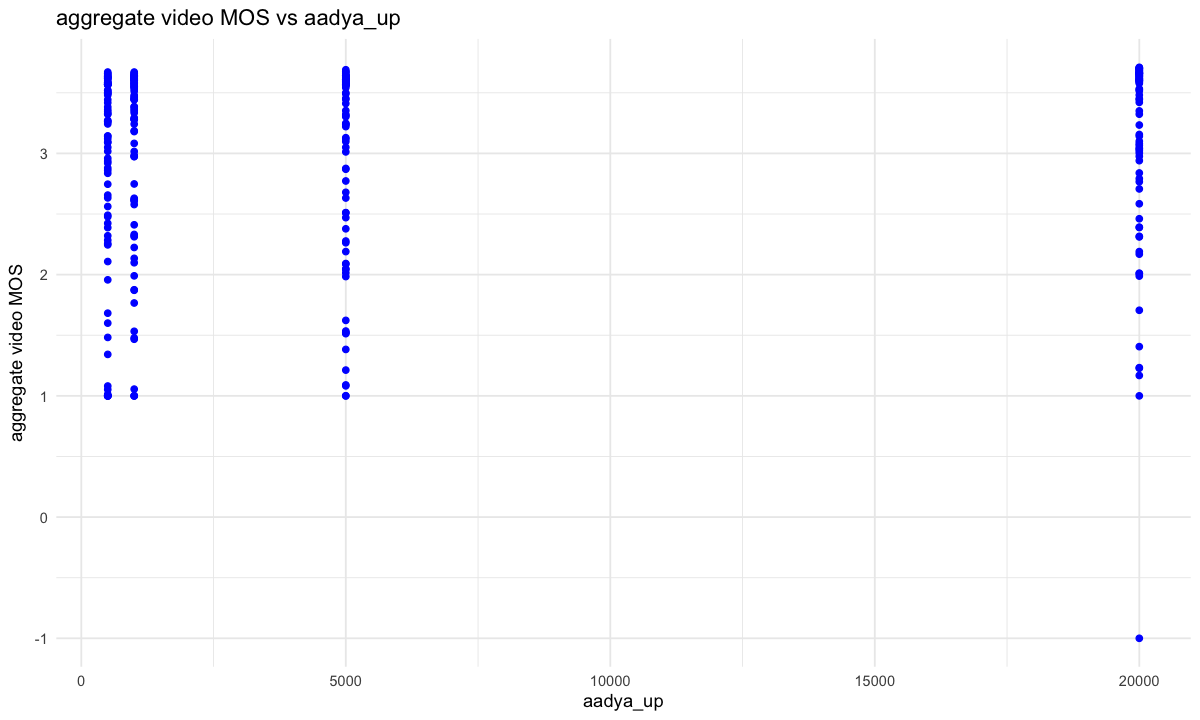

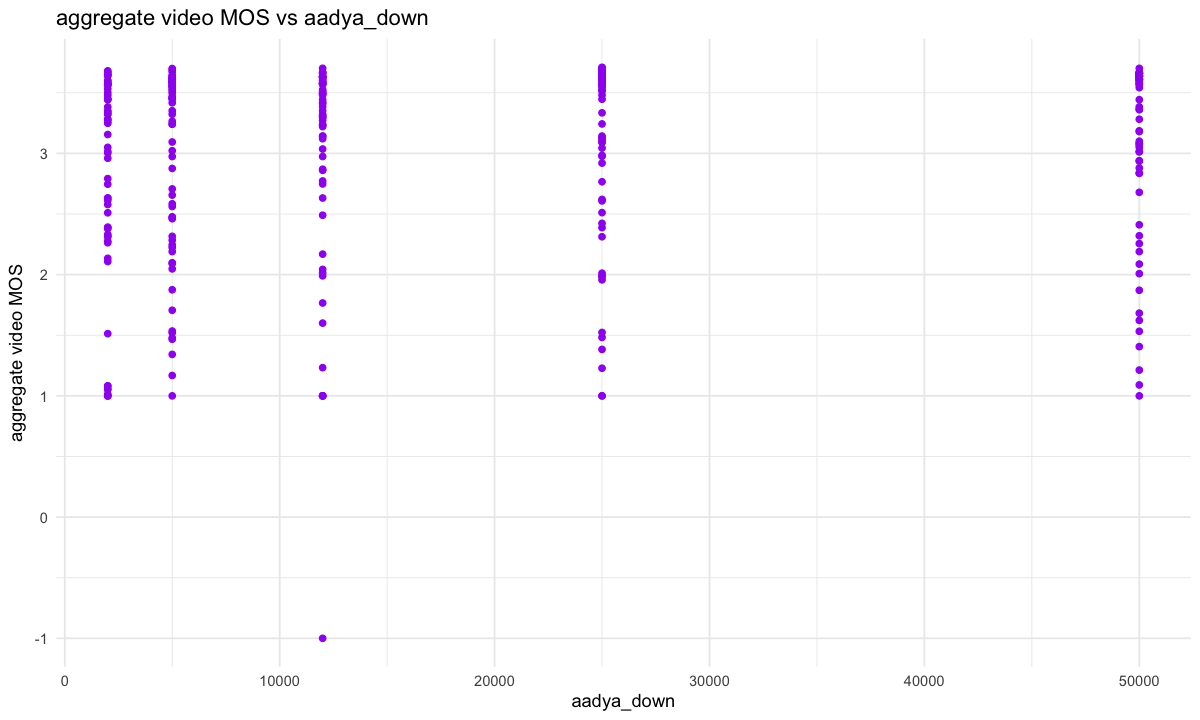

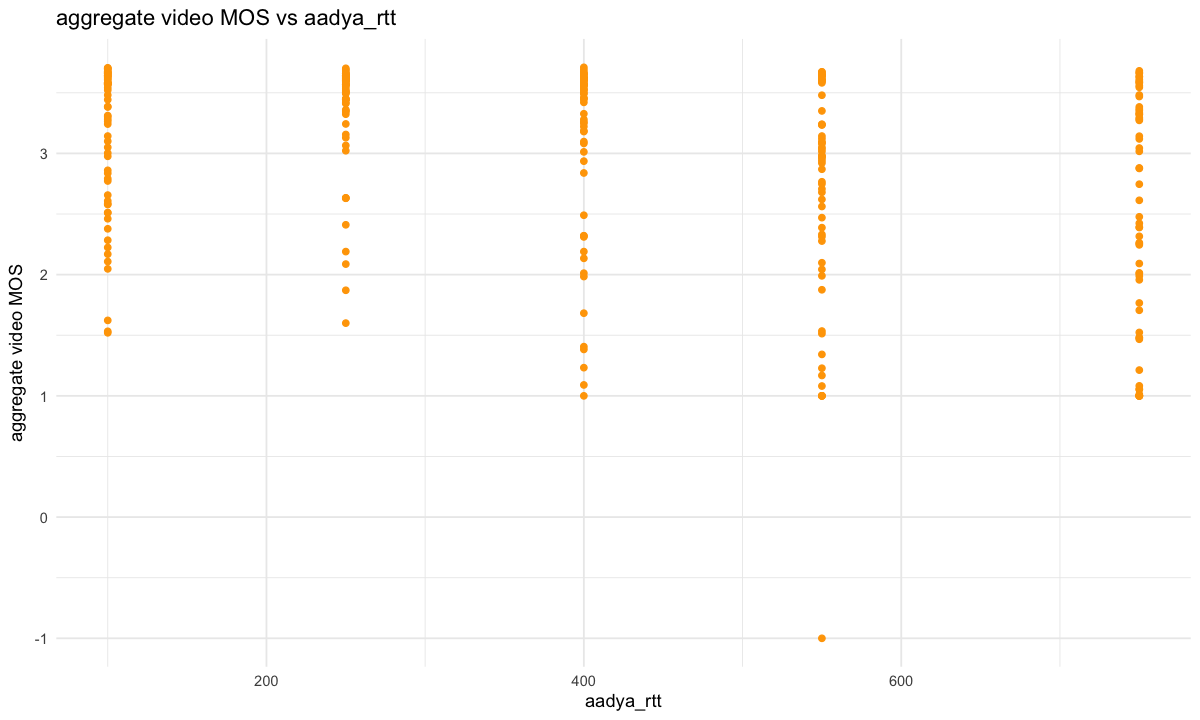

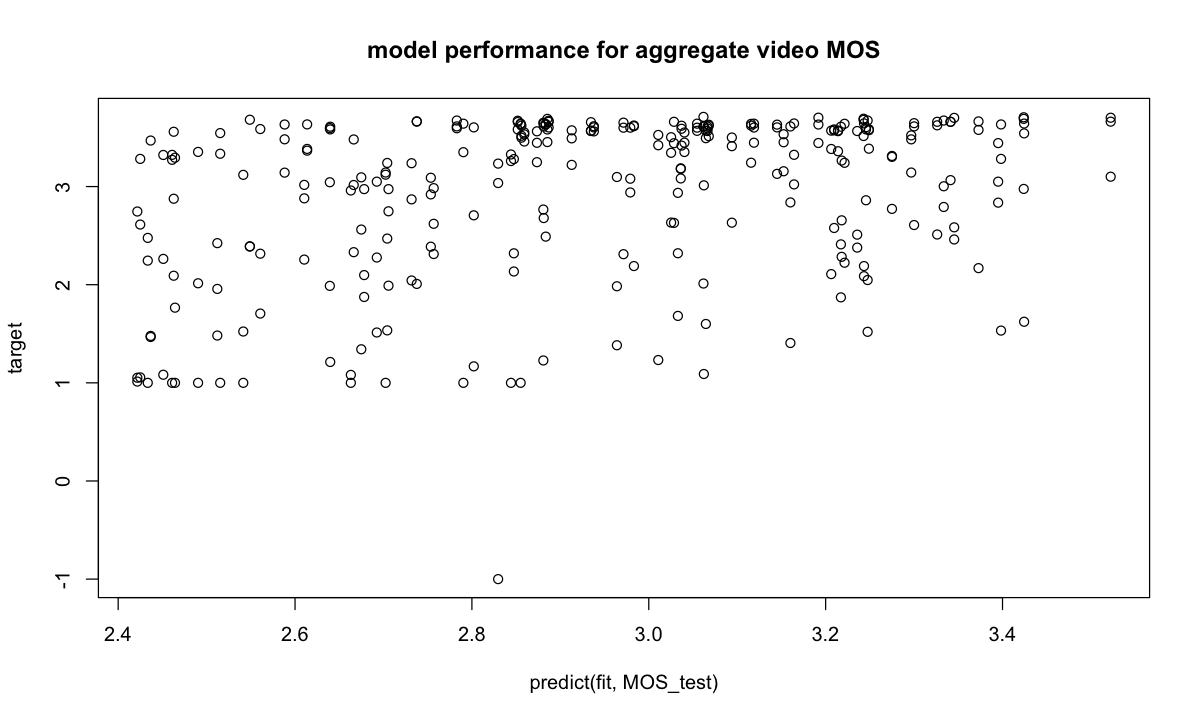

In [98]:
plot_vars_against_targ(MOS_test$agg_video_MOS, "aggregate video MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1090 -0.2934  0.2464  0.4686  1.0429 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.792e+00  1.053e-01  36.020  < 2e-16 ***
aadya_up    -1.481e-06  5.374e-06  -0.276    0.783    
aadya_down   9.883e-07  2.431e-06   0.406    0.685    
aadya_rtt   -1.210e-03  1.876e-04  -6.449 4.57e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7368 on 296 degrees of freedom
Multiple R-squared:  0.1238,	Adjusted R-squared:  0.115 
F-statistic: 13.95 on 3 and 296 DF,  p-value: 1.577e-08



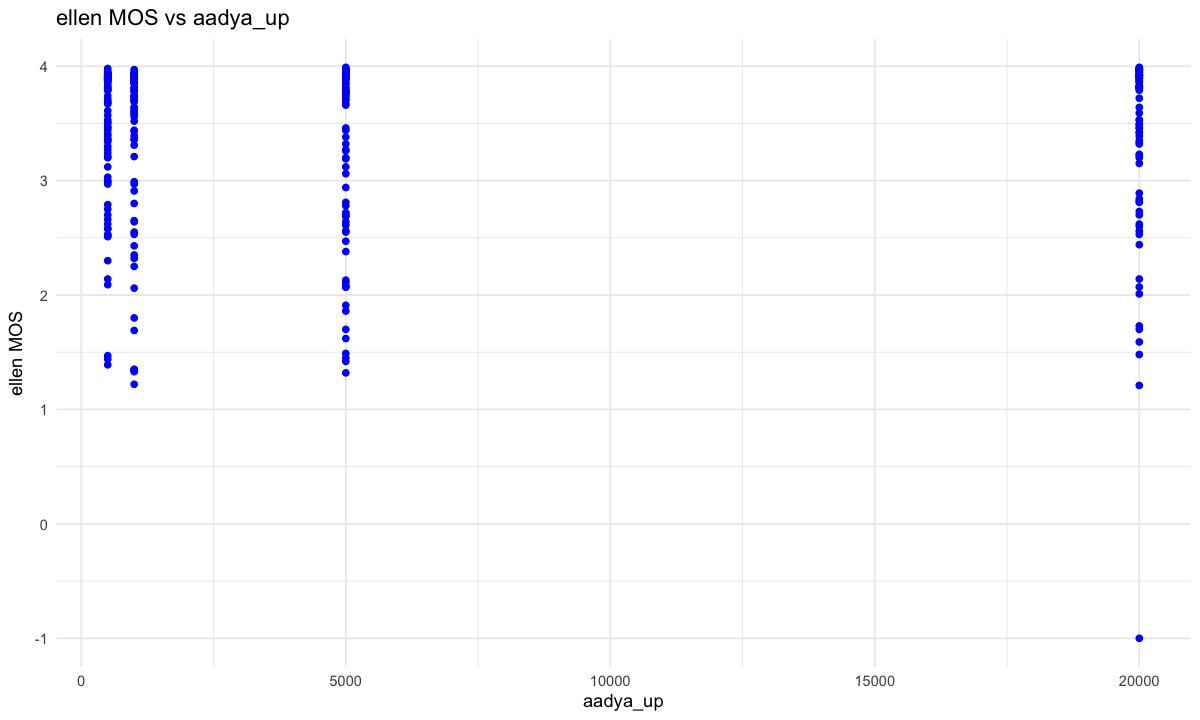

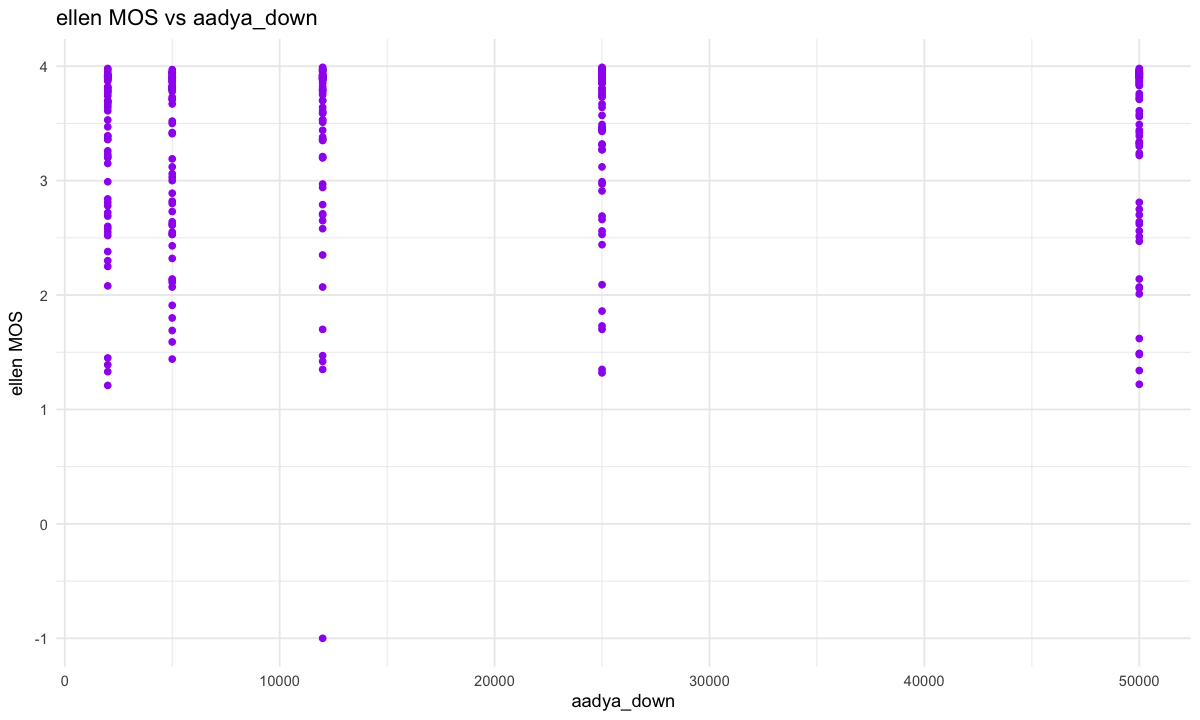

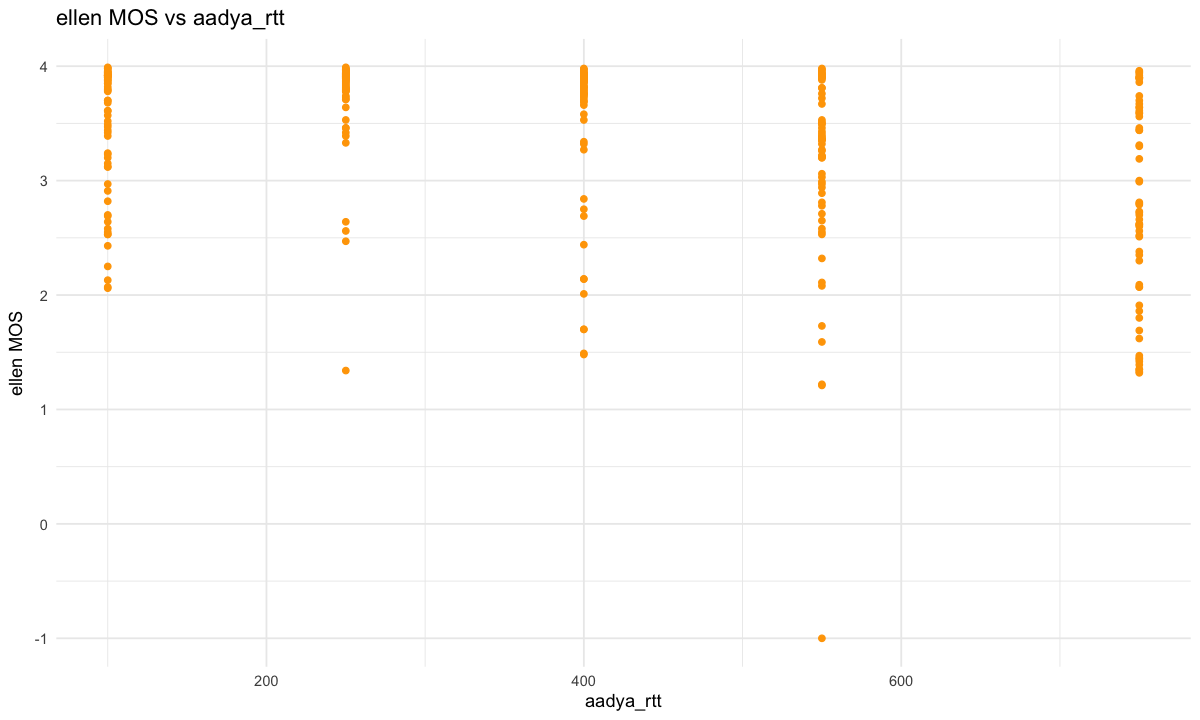

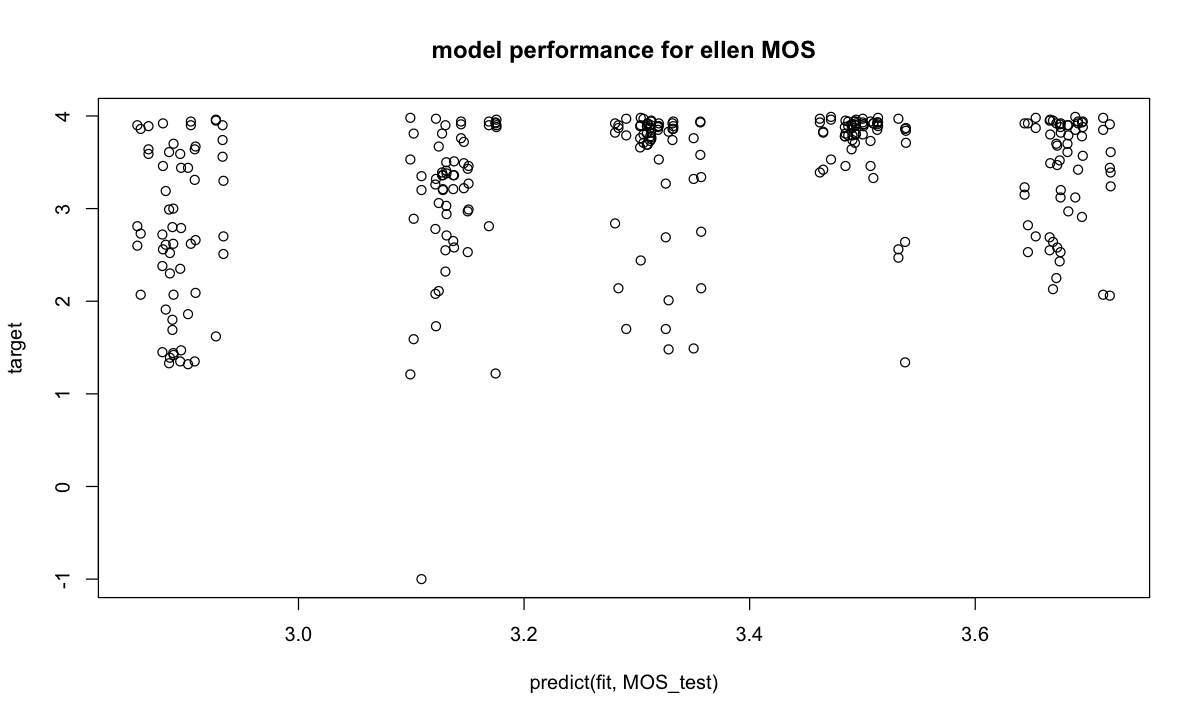

In [99]:
plot_vars_against_targ(MOS_test$ellen_MOS, "ellen MOS")


Call:
lm(formula = target ~ aadya_up + aadya_down + aadya_rtt, data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4784 -0.1818  0.0694  0.3313  1.1406 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.150e+00  7.343e-02  42.895  < 2e-16 ***
aadya_up     3.581e-05  3.748e-06   9.556  < 2e-16 ***
aadya_down   1.188e-05  1.696e-06   7.008 1.63e-11 ***
aadya_rtt   -9.642e-04  1.309e-04  -7.368 1.74e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5139 on 296 degrees of freedom
Multiple R-squared:  0.3968,	Adjusted R-squared:  0.3907 
F-statistic: 64.91 on 3 and 296 DF,  p-value: < 2.2e-16



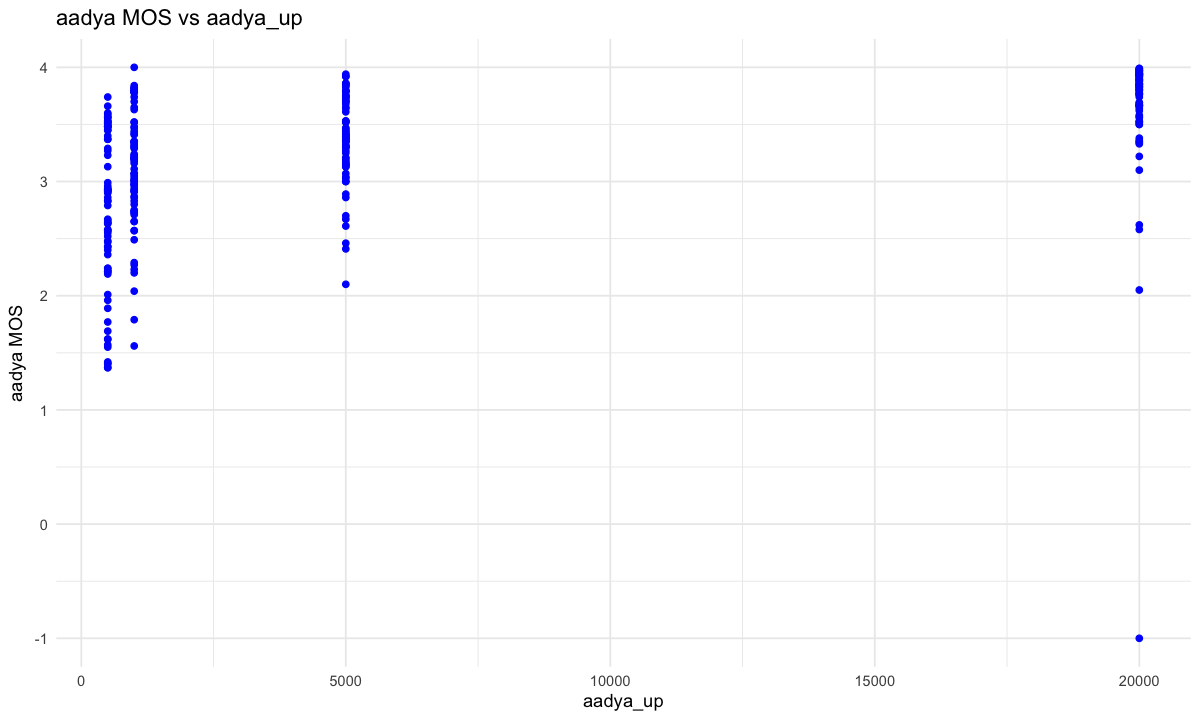

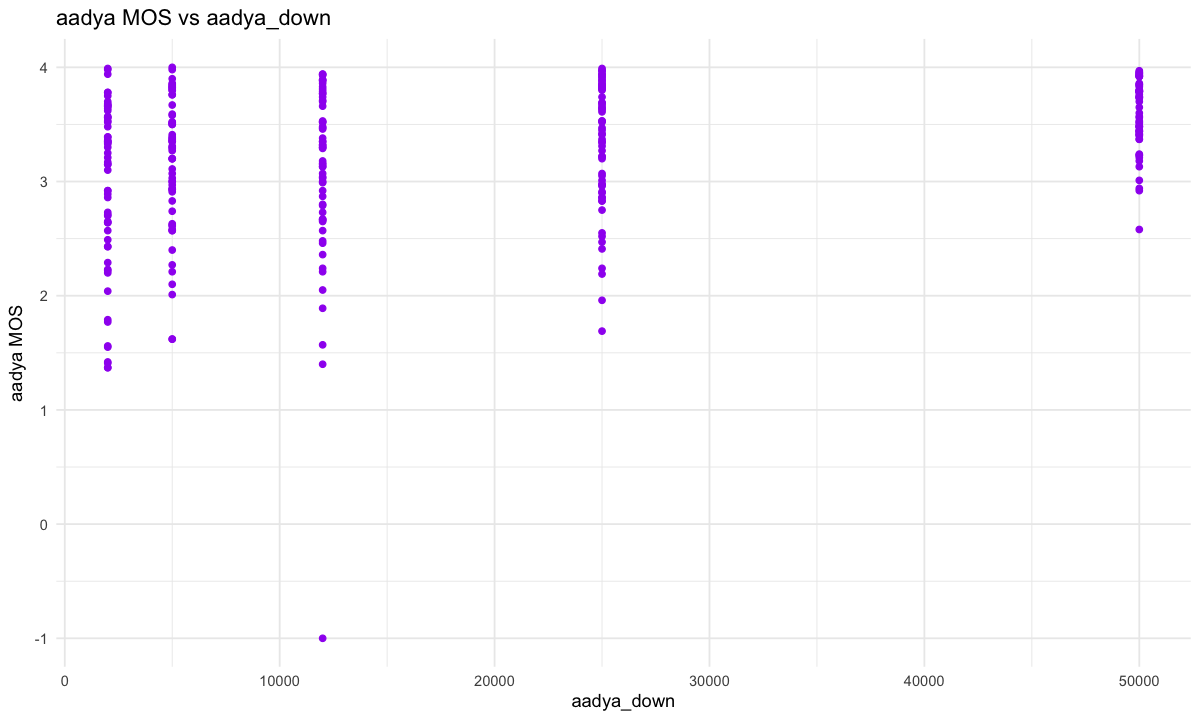

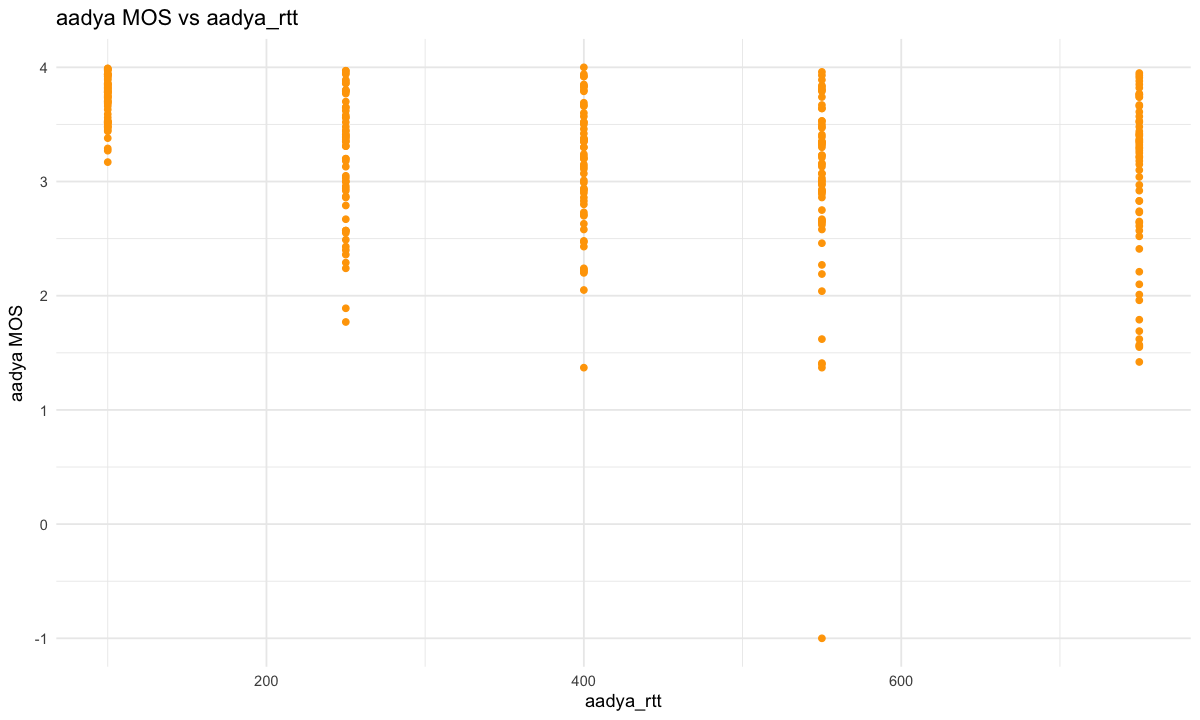

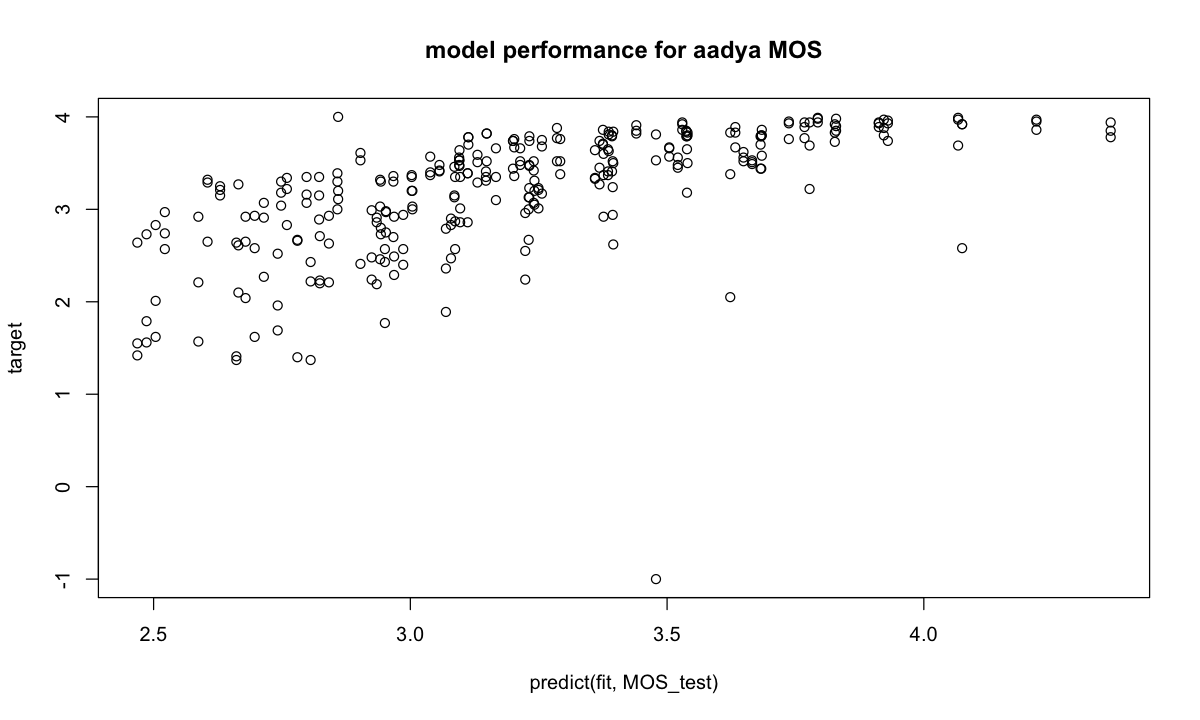

In [100]:
plot_vars_against_targ(MOS_test$aadya_MOS, "aadya MOS")

# Logistic Regression

I'm not sure if this is right but I think if MOS is categorical it should be something like this

In [ ]:
library(nnet)

# Fit the logistic regression model
model <- multinom(AGG_MOST ~ up + down + rtt, data = MOS_test)
summary(model)
# Get predictions
predictions <- predict(model, MOS_test, type = "probs")
print(prediction)